<a href="https://colab.research.google.com/github/Mike-R-B-Lab/Loan_Classification_Model/blob/main/Loan_Default_Prediction_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**


## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

In [5]:
# Installing sklearn_extra library
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00


In [4]:
# Importing necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithm
from sklearn.cluster import KMeans

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Data Overview**

In [2]:
# Connecting to Google drive (location of csv file)
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Loading the lead data into a panda df
data = pd.read_csv('/content/drive/MyDrive/MIT_certificate/Project #3/hmeq.csv')

In [7]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [8]:
# Copy of the data that we will use
df = data.copy()

In [9]:
# Viewing the first 10 rows of the data
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [10]:
# Finding the amount of columns and rows
df.shape

(5960, 13)

In [11]:
# Viewing the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [12]:
# Checking the count of unique values in each column
df.nunique()

,0
BAD,2
LOAN,540
MORTDUE,5053
VALUE,5381
REASON,2
JOB,6
YOJ,99
DEROG,11
DELINQ,14
CLAGE,5314


In [13]:
# Checking the count of missing values in each column
df.isnull().sum()

,0
BAD,0
LOAN,0
MORTDUE,518
VALUE,112
REASON,252
JOB,279
YOJ,515
DEROG,708
DELINQ,580
CLAGE,308


In [14]:
# Total missing values
data.isnull().sum().sum()

5271

In [15]:
# Finding duplicates
duplicates = df.duplicated()
print(f'There are {duplicates.sum()} duplicate rows in the data')

There are 0 duplicate rows in the data


In [16]:
# There are a lot of missing values. If a person has multiple missing values, this could
# indicate that they are trying to hide something

# Creating a column that sums the null values per row
df['Null_count'] = df.isna().sum(axis=1)

In [17]:
perc_missing_d= df['DEBTINC'].isnull().sum()/len(df)*100
print(f'DEBTINC column has {perc_missing_d:.2f}% missing values')

DEBTINC column has 21.26% missing values


In [18]:
# It had 20% missing values. We will drop this column
df.drop('DEBTINC', axis = 1, inplace = True)

In [19]:
# Finding all the
stats = df.describe().T
print(stats)

             count           mean           std     min           25%  \
BAD         5960.0       0.199497      0.399656     0.0      0.000000   
LOAN        5960.0   18607.969799  11207.480417  1100.0  11100.000000   
MORTDUE     5442.0   73760.817200  44457.609458  2063.0  46276.000000   
VALUE       5848.0  101776.048741  57385.775334  8000.0  66075.500000   
YOJ         5445.0       8.922268      7.573982     0.0      3.000000   
DEROG       5252.0       0.254570      0.846047     0.0      0.000000   
DELINQ      5380.0       0.449442      1.127266     0.0      0.000000   
CLAGE       5652.0     179.766275     85.810092     0.0    115.116702   
NINQ        5450.0       1.186055      1.728675     0.0      0.000000   
CLNO        5738.0      21.296096     10.138933     0.0     15.000000   
Null_count  5960.0       0.884396      1.597182     0.0      0.000000   

                     50%            75%            max  
BAD             0.000000       0.000000       1.000000  
LOAN     

# **Observations:**

*   There are **5960 observations and 13 columns** in the dataset.
*   Many columns **don't have 5960 non-null values**, i.e., there are many missing values in the data.
* More than 20% of the values in the DEBTINC column are missing
* At least 25% of applicants have a missing value in their application


## **Exploratory Data Analysis (EDA) and Visualization**

### **Univariate Analysis**


In [20]:
# Creating a list of numerical columns
num_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'Null_count']

# Creating a list of categorical columns
cat_columns = ['REASON', 'JOB']

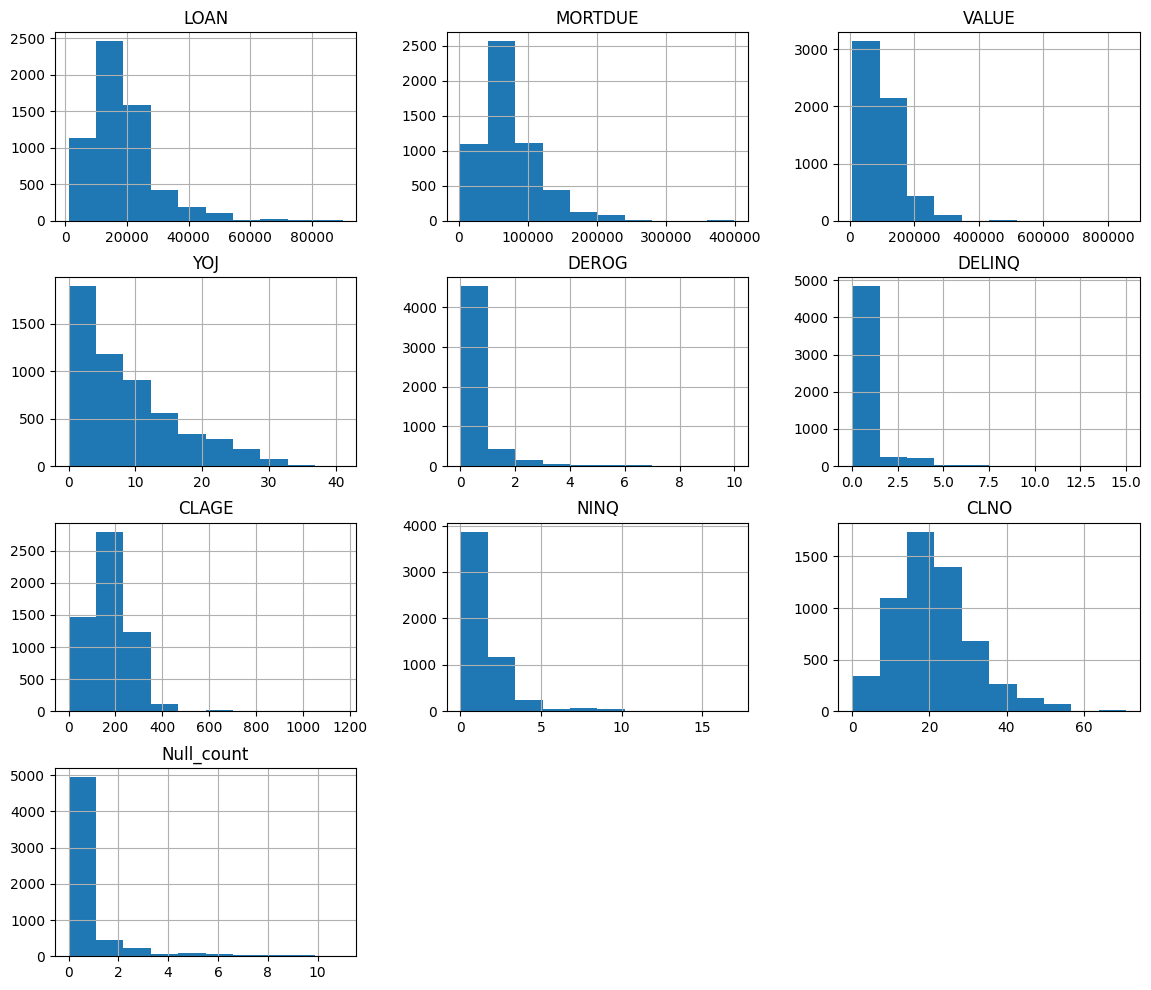

In [21]:
# Creating histograms for every numerical column
df[num_columns].hist(figsize = (14, 12))
plt.show()

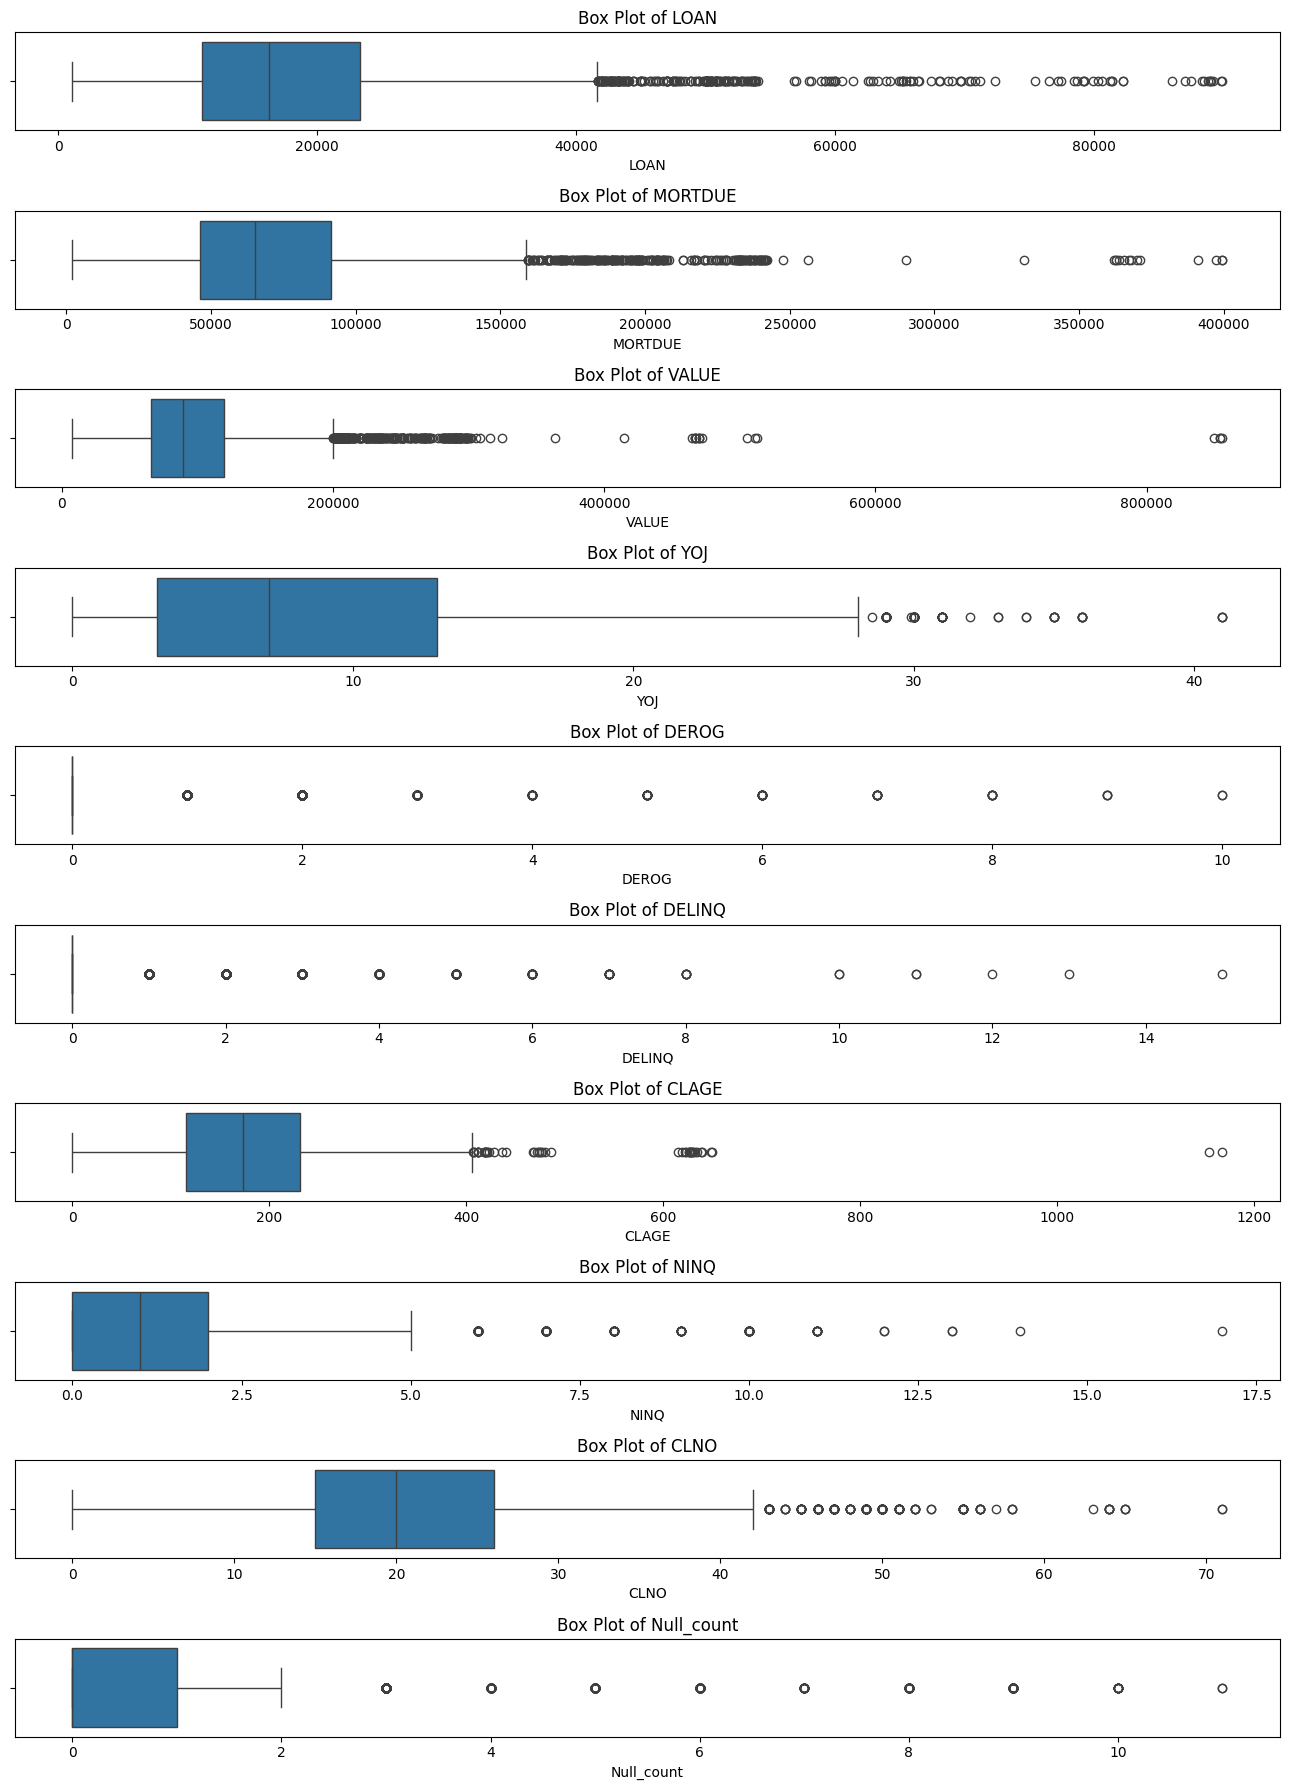

In [23]:
# 10x1 box plot
fig, axes = plt.subplots(10, 1, figsize=(13, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Going through all the numerical columns and plotting a horizontal box plot
for i, col in enumerate(num_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)
    plt.tight_layout()

In [24]:
# Looping through every categorical column in the df, counting every categorical value
# and normalizing the count (sum = 1)
for i in cat_columns:
    print(df[i].value_counts(normalize = True))

    # Print a separator of 35 asterisks
    print('*' * 35)

REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
***********************************
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
***********************************


# **Observations:**


* The current value of property distribution is slightly skewed right which indicates that most poeple have relatively lower property value.

* The years worked at current job has a geometric distribution which indicates most employees have worked at their current job for a relatively short time.

* A vaste majority of people have never had a deragatory report or a delinquant credit line.

* The number of existing credit lines is right-skewed with many outliers well above 40 lines of credit.

* **42% of job types are considered unkown**. We will drop this column as it doesn't have a significant impact on our data.

In [25]:
# Dropping job column
df=df.drop('JOB',axis=1)

### **Bivariate Analysis**

In [26]:
# The mean of numerical variables grouped by status (defaulted or not)
df.groupby(['BAD'])[num_columns].mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,Null_count
BAD,,,,,,,,,,
0,19028.107315,74829.249055,102595.921018,9.154941,0.134217,0.245133,187.002355,1.032749,21.317036,0.790820
1,16922.119428,69460.452973,98172.846227,8.027802,0.707804,1.229185,150.190183,1.782765,21.211268,1.259882


In [27]:
# Creating a df with all debt consolidation loans
debtcon = df[df['REASON'] == 'DebtCon']
# Creating a df with all the debt consol. who defaulted
debtcon_def = debtcon[debtcon['BAD'] == 1]
# Calculating the percentage of debt consol. who defaulted
percentage_default_debtcon = (debtcon_def.shape[0])/debtcon.shape[0]*100


# Creating a df with all home improvement loans
home_imp = df[df['REASON'] == 'HomeImp']
# Creating a with all the home imp. who defaulted
home_imp_def = home_imp[home_imp['BAD'] == 1]
# Calculating the percentage of home imp. who defaulted
percentage_default_home = (home_imp_def.shape[0])/home_imp.shape[0]*100

# Printing the results
print(f'The percentage of people who defaulted on their debt consolidation loans is {percentage_default_debtcon:.2f}%')
print(f'The percentage of people who defaulted on their home improvement loans is {percentage_default_home:.2f}%')

The percentage of people who defaulted on their debt consolidation loans is 18.97%
The percentage of people who defaulted on their home improvement loans is 22.25%


<Axes: >

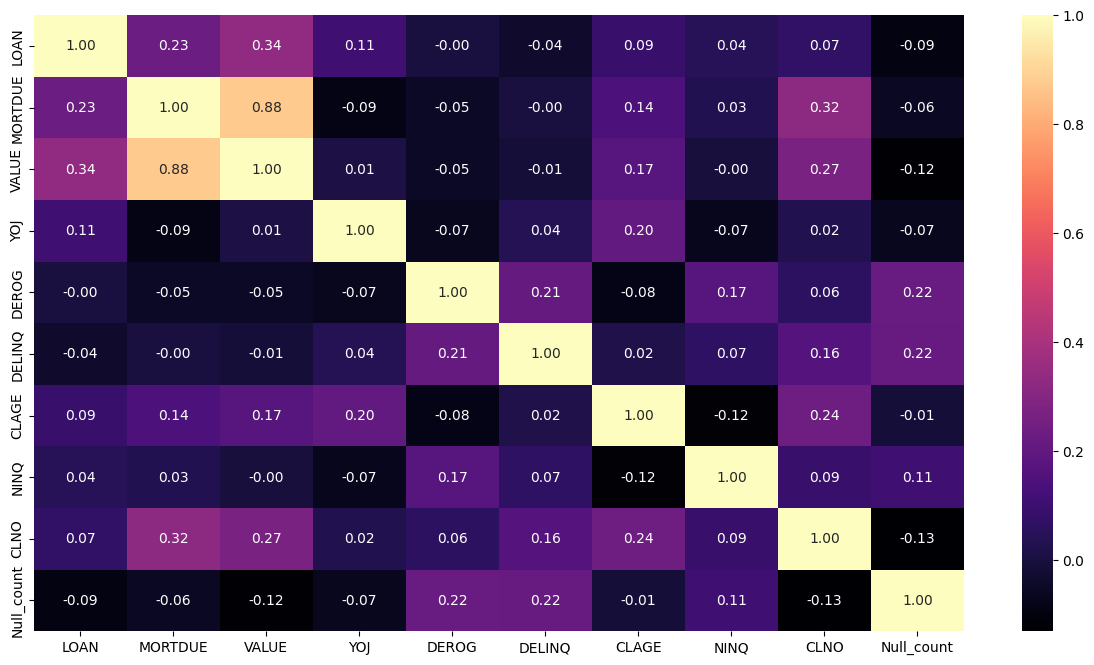

In [28]:
# Plotting the a heatmap correlation between numerical columns
plt.figure(figsize = (15, 8))

sns.heatmap(df[num_columns].corr(), annot = True, fmt = '0.2f', cmap = 'magma')


In [29]:
# Copying data
dfcopy = df.copy()

Text(0, 0.5, 'Percentage %')

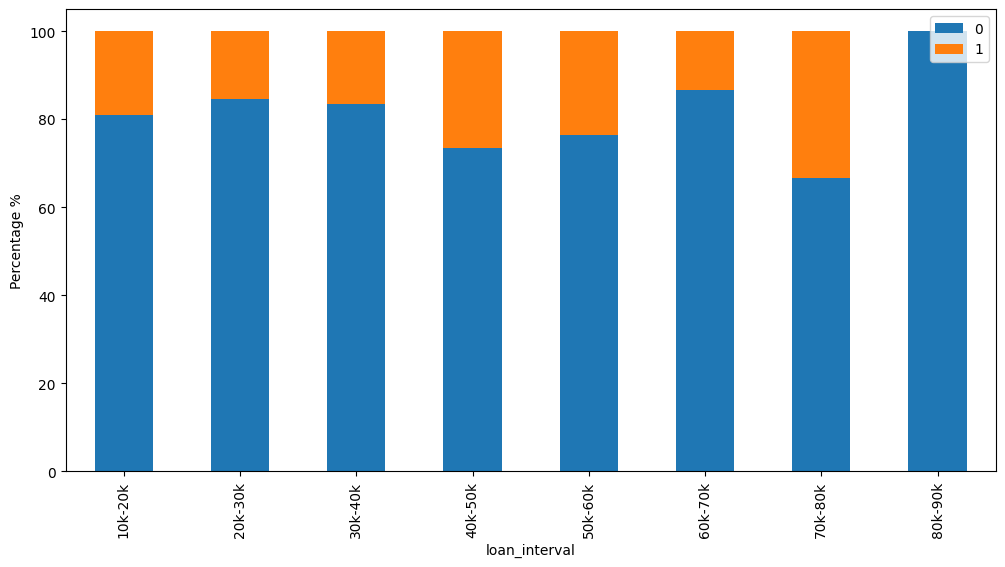

In [30]:
# Creating the bin intervals and labels for loans
bin_edges = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
bin_labels = ['10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k','70k-80k','80k-90k']

# Creating loan interval column in the dfcopy and associating each customer in a bin
dfcopy['loan_interval'] = pd.cut(dfcopy['LOAN'], bins=bin_edges, labels=bin_labels, right=False)

# Plotting a stacked bar plot to visualize the ratio of defaulted loans
# for every loan interval
(pd.crosstab(dfcopy['loan_interval'], dfcopy['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.legend(loc='upper right')
plt.ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

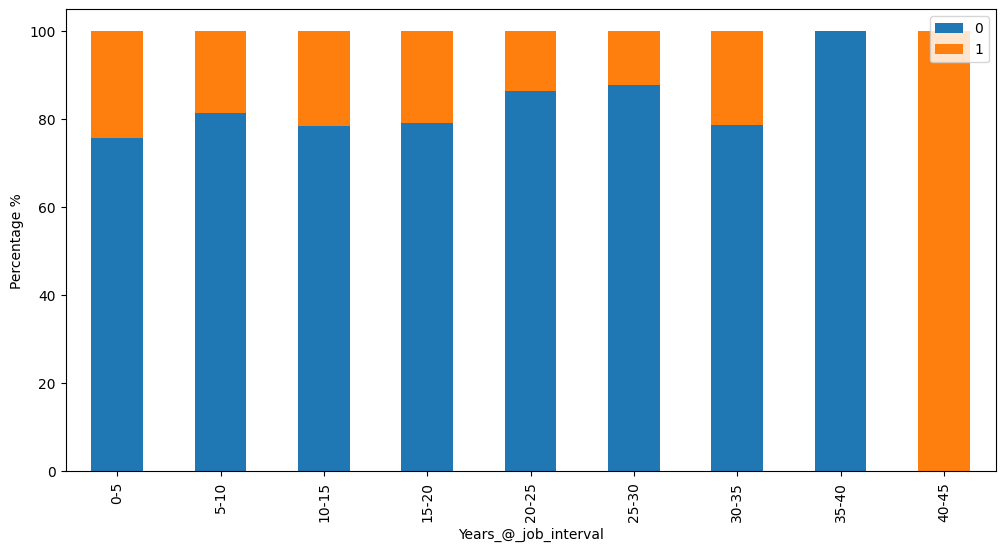

In [31]:
# Creating the bin intervals and labels for years @ job
bin_edges2 = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
bin_labels2 = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30','30-35','35-40','40-45']


# Creating years @ job interval column in the dfcopy and associating each customer in a bin
dfcopy['Years_@_job_interval'] = pd.cut(dfcopy['YOJ'], bins=bin_edges2, labels=bin_labels2, right=False)

# Plotting a stacked bar plot to visualize the ratio of defaulted loans
# for every years @ job interval
(pd.crosstab(dfcopy['Years_@_job_interval'], dfcopy['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.legend(loc='upper right')
plt.ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

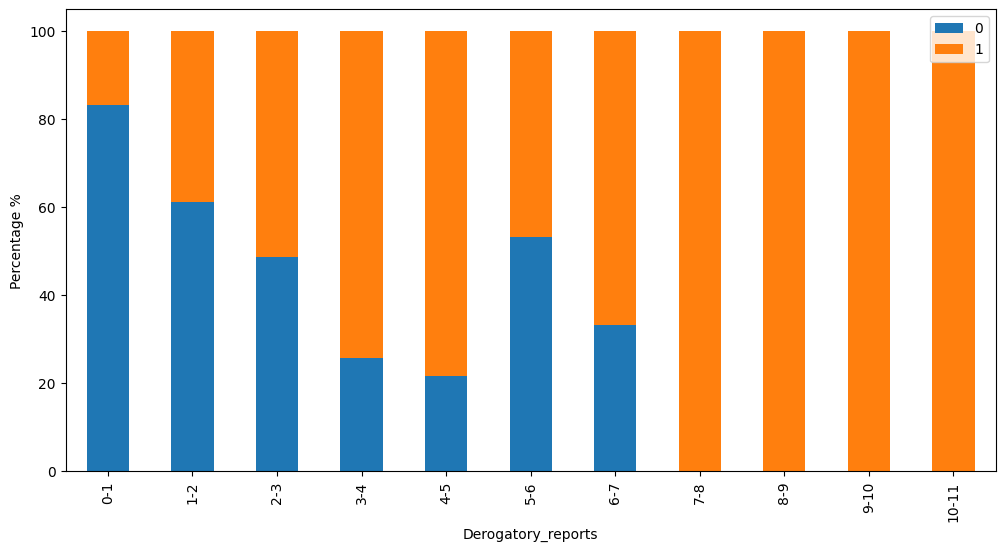

In [32]:
# Creating the bin intervals and labels for derog. reports
bin_edges3 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
bin_labels3 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6','6-7','7-8','8-9','9-10','10-11']


# Creating derog. reports interval column in the dfcopy and associating each customer in a bin
dfcopy['Derogatory_reports'] = pd.cut(dfcopy['DEROG'], bins=bin_edges3, labels=bin_labels3, right=False)

# Plotting a stacked bar plot to visualize the ratio of defaulted loans
# for every derog. interval
(pd.crosstab(dfcopy['Derogatory_reports'], dfcopy['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.legend(loc='upper right')
plt.ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

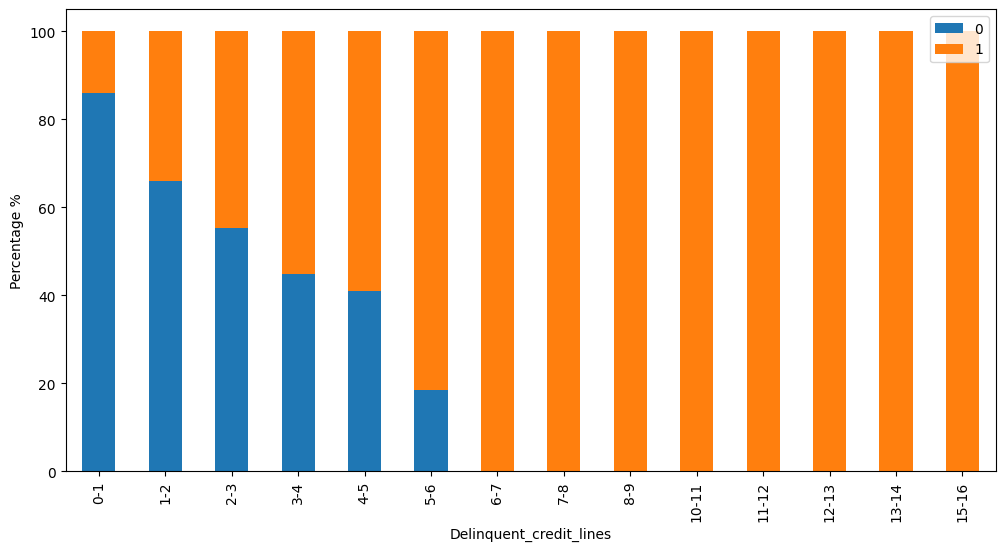

In [33]:
# Creating the bin intervals and labels for Num. delinquent credit lines
bin_edges4 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
bin_labels4 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16']


# Creating delinquent credit line interval column in the dfcopy and associating each customer in a bin
dfcopy['Delinquent_credit_lines'] = pd.cut(dfcopy['DELINQ'], bins=bin_edges4, labels=bin_labels4, right=False)

# Plotting a stacked bar plot to visualize the ratio of defaulted loans
# for every delinquent credit line interval
(pd.crosstab(dfcopy['Delinquent_credit_lines'], dfcopy['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.legend(loc='upper right')
plt.ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

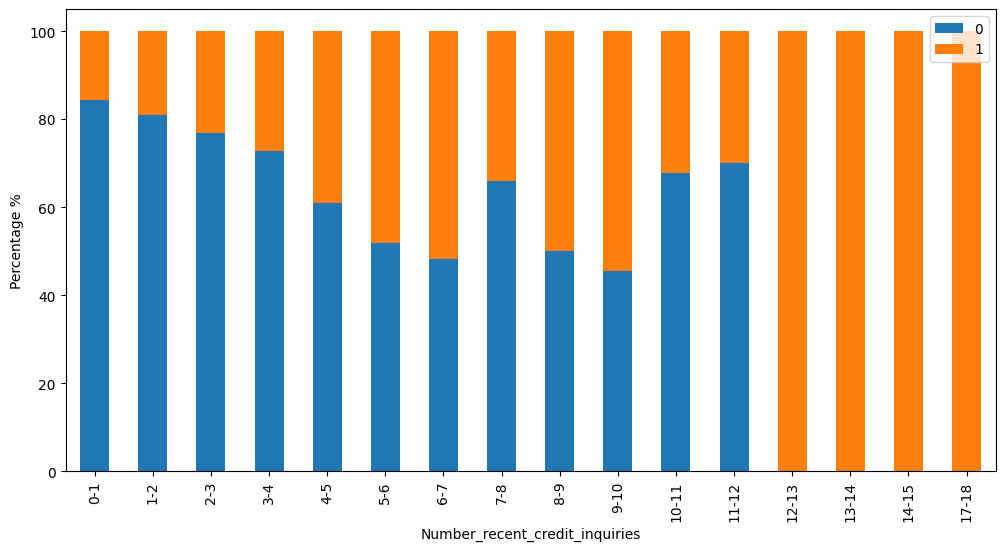

In [34]:
# Creating the bin intervals and labels for Num. of recent credit inquiries
bin_edges5 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
bin_labels5 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18']


# Creating recent credit inquiries interval column in the dfcopy and associating each customer in a bin
dfcopy['Number_recent_credit_inquiries'] = pd.cut(dfcopy['NINQ'], bins=bin_edges5, labels=bin_labels5, right=False)

# Plotting a stacked bar plot to visualize the ratio of defaulted loans
# for every credit inquiries interval
(pd.crosstab(dfcopy['Number_recent_credit_inquiries'], dfcopy['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.legend(loc='upper right')
plt.ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

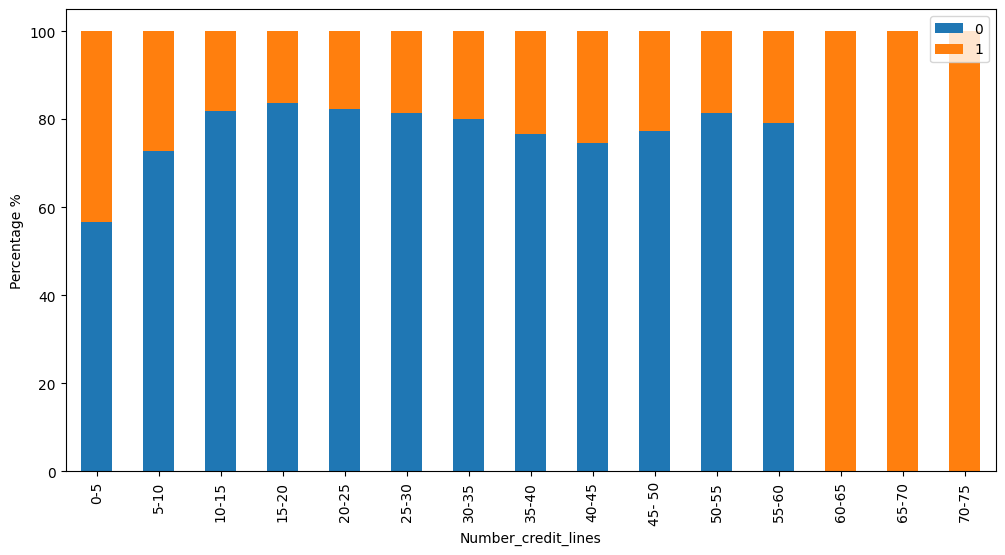

In [35]:
# Creating the bin intervals and labels for Num. of credit lines
bin_edges6 = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
bin_labels6= ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30','30-35','35-40','40-45','45- 50','50-55','55-60','60-65','65-70','70-75']


# Creating num.credit lines interval column in the dfcopy and associating each customer in a bin
dfcopy['Number_credit_lines'] = pd.cut(dfcopy['CLNO'], bins=bin_edges6, labels=bin_labels6, right=False)

# Plotting a stacked bar plot to visualize the ratio of defaulted loans
# for every num. of credit line interval
(pd.crosstab(dfcopy['Number_credit_lines'], dfcopy['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.legend(loc='upper right')
plt.ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

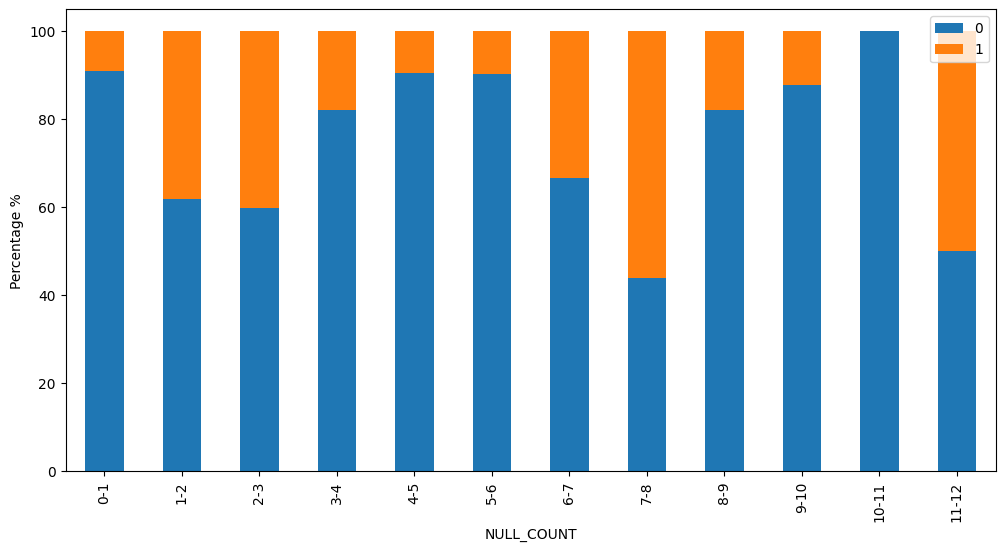

In [36]:
# Creating the bin intervals and labels for null value count
bin_edges8 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
bin_labels8 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6','6-7','7-8','8-9','9-10','10-11','11-12']


# Creating null value count interval column in the dfcopy and associating each customer in a bin
dfcopy['NULL_COUNT'] = pd.cut(dfcopy['Null_count'], bins=bin_edges8, labels=bin_labels8, right=False)

# Plotting a stacked bar plot to visualize the ratio of defaulted loans
# for every null value count interval
(pd.crosstab(dfcopy['NULL_COUNT'], dfcopy['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.legend(loc='upper right')
plt.ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

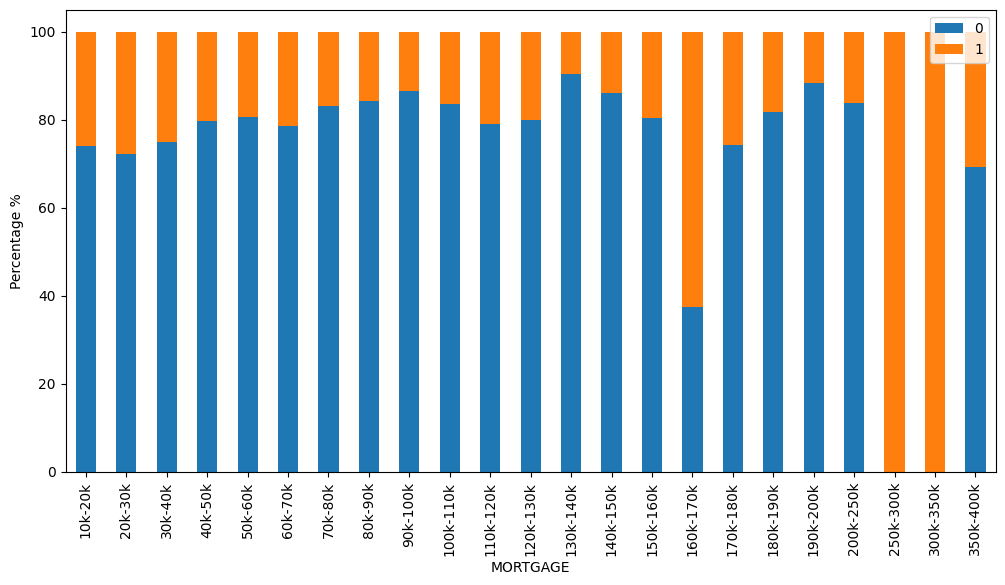

In [37]:
# Creating the bin intervals and labels for MORTDUE
bin_edges9 = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000,
             150000, 160000, 170000, 180000, 190000, 200000, 250000, 300000, 350000, 400000]
bin_labels9 = ['10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k','70k-80k','80k-90k','90k-100k','100k-110k', '110k-120k', '120k-130k', '130k-140k',
              '140k-150k','150k-160k','160k-170k','170k-180k','180k-190k','190k-200k','200k-250k','250k-300k','300k-350k','350k-400k']

# Creating MORTDUE interval column in the dfcopy and associating each customer in a bin
dfcopy['MORTGAGE'] = pd.cut(dfcopy['MORTDUE'], bins=bin_edges9, labels=bin_labels9, right=False)

# Plotting a stacked bar plot to visualize the ratio of defaulted loans
# for every MORTDUE interval
(pd.crosstab(dfcopy['MORTGAGE'], dfcopy['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.legend(loc='upper right')
plt.ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

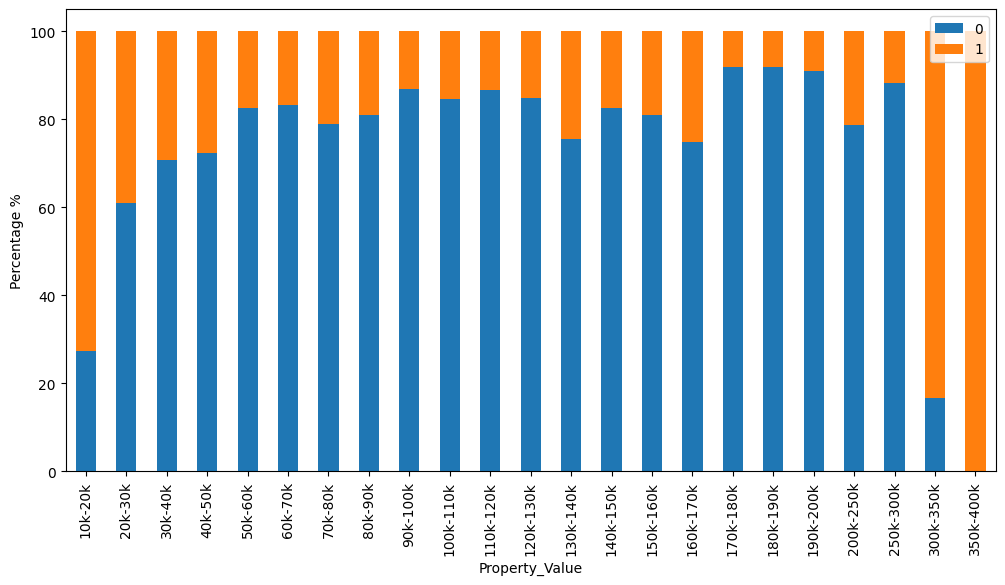

In [38]:
# Creating the bin intervals and labels for Value
bin_edges10 = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000,
             150000, 160000, 170000, 180000, 190000, 200000, 250000, 300000, 350000, 400000, 900000]
bin_labels10 = ['10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k','70k-80k','80k-90k','90k-100k','100k-110k', '110k-120k', '120k-130k', '130k-140k',
              '140k-150k','150k-160k','160k-170k','170k-180k','180k-190k','190k-200k','200k-250k','250k-300k','300k-350k','350k-400k','Above 400k']

# Creating Value interval column in the dfcopy and associating each customer in a bin
dfcopy['Property_Value'] = pd.cut(dfcopy['VALUE'], bins=bin_edges9, labels=bin_labels9, right=False)

# Plotting a stacked bar plot to visualize the ratio of defaulted loans
# for every property value interval
(pd.crosstab(dfcopy['Property_Value'], dfcopy['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.legend(loc='upper right')
plt.ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

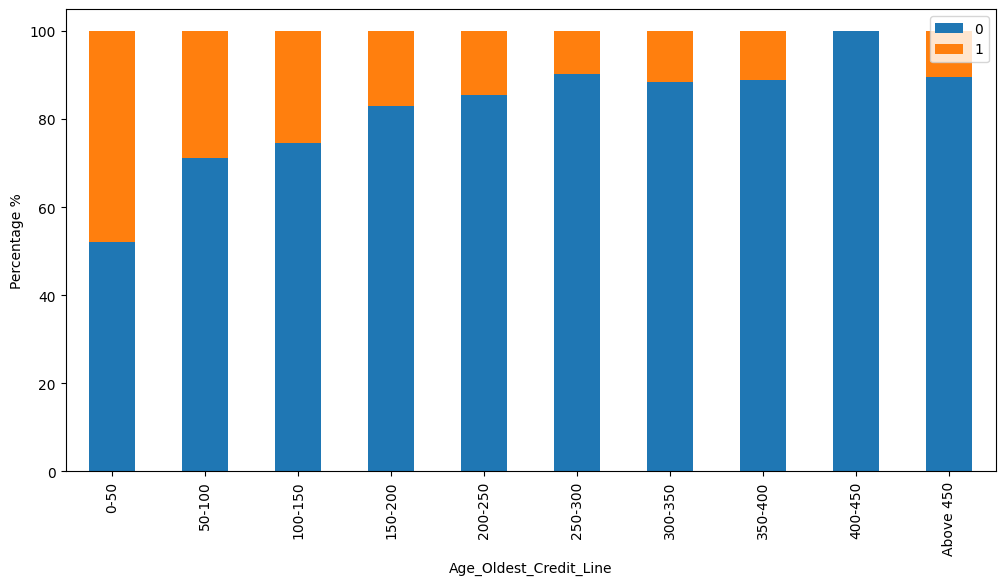

In [39]:
# Creating the bin intervals and labels for age oldest credit line
bin_edges11 = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 1200]
bin_labels11= ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300','300-350','350-400','400-450','Above 450']


# Creating age oldest credit line interval column in the dfcopy and associating each customer in a bin
dfcopy['Age_Oldest_Credit_Line'] = pd.cut(dfcopy['CLAGE'], bins=bin_edges11, labels=bin_labels11, right=False)

# Plotting a stacked bar plot to visualize the ratio of defaulted loans
# for everyage oldest credit line interval
(pd.crosstab(dfcopy['Age_Oldest_Credit_Line'], dfcopy['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (12, 6), stacked = True)
plt.legend(loc='upper right')
plt.ylabel('Percentage %')

# **Observations:**

* Individuals with a relatively **young oldest credit** line are **more likely to default** on their loan, likely due to inexperience.

* There’s a strong correlation between the current property value and the amount due on the existing mortgage, which is expected since higher property values typically correspond to larger mortgage balance.

* People seem to be a little more sceptible to default in the loan range of 40k-60k.

* Having at least **one derogatory report** increases your odds of defaulting to nearly **40%**, with the likelihood rising as the number of reports increases.

* Having at least** one delinquent credit line** raises your odds of defaulting to over **30%**, with the likelihood increasing as the number of delinquent credit lines grows.

* The odds of defaulting on a loan are correlated with the number of recent credit inquiries, specifically for non-outliers (up to 5 inquiries).

* **Over 40% of individuals with less than 5 credit lines default** on their loans, likely because they may be using multiple credit lines to manage other debts.

* **40% of people with 1 or 2 missing values default on their loan.** There seems to be no correlation for the outliers (3 missing data point and up).

* Someone has a significantly **high chance of defaulting** on their loan if they have a property under the **value of 50k**. These odds are at ~70% for people with property value under 20k.

### Treating Missing Values

In [40]:
# We know there's a strong correlation between the MORTDUE and VALUE column.
# We'll use this correlation to replace missing values in both columns

missing_rows = df[df['MORTDUE'].isna() & df['VALUE'].isna() ]

# Get the number of rows with missing mortgage due and property value data
missing_rows.shape[0]

27

In [41]:
median_value = df['VALUE'].median()

# Replace missing values in VALUE with the median of VALUE,
# but only for rows where both MORTDUE and VALUE are missing
df.loc[df['MORTDUE'].isna() & df['VALUE'].isna(), 'VALUE'] = median_value

In [42]:
# Data without missing values
non_missing_data = df[['MORTDUE','VALUE']].dropna()

# Data with missing values in MORTDUE
missing_data = df[df['MORTDUE'].isna()]

# Linear Regression model
model = LinearRegression()

# Reshape data for model fitting
x = non_missing_data['VALUE'].values.reshape(-1, 1)  # Independent variable
y = non_missing_data['MORTDUE'].values  # Dependent variable

# Fit the model
model.fit(x, y)

# Predict missing values
predicted_values = model.predict(missing_data['VALUE'].values.reshape(-1, 1))

# Fill the missing values in MORTDUE
df.loc[df['MORTDUE'].isna(), 'MORTDUE'] = predicted_values

In [43]:
# Same thing but now replacing missing data in VALUE column

# Data without missing values
non_missing_data2 = df[['MORTDUE','VALUE']].dropna()

# Data with missing values in VALUE
missing_data2 = df[df['VALUE'].isna()]

# Linear Regression model
model2 = LinearRegression()

# Reshape data for model fitting
x2 = non_missing_data2['MORTDUE'].values.reshape(-1, 1)  # Independent variable
y2 = non_missing_data2['VALUE'].values  # Dependent variable

# Fit the model
model2.fit(x2, y2)

# Predict missing values
predicted_values2 = model2.predict(missing_data2['MORTDUE'].values.reshape(-1, 1))

# Fill the missing values in VALUE
df.loc[df['VALUE'].isna(), 'VALUE'] = predicted_values2

In [44]:
# Replacing missing values of years worked at current job by median because outliers influence mean
df['YOJ'].fillna(df['YOJ'].median(), inplace=True)
# Replacing missing values of DEROG by mode because more than 75% have 0
df['DEROG'].fillna(df['DEROG'].mode()[0], inplace=True)
# Replacing missing values of DELINQ by mode because more than 75% have 0
df['DELINQ'].fillna(df['DELINQ'].mode()[0], inplace=True)
# Replacing missing values of CLAGE by median because outliers influence mean
df['CLAGE'].fillna(df['CLAGE'].median(), inplace=True)
# Replacing missing values of NINQ by median because outliers influence mean
df['NINQ'].fillna(df['NINQ'].median(), inplace=True)
# Replacing missing values of CLNO by median because outliers influence mean
df['CLNO'].fillna(df['CLNO'].median(), inplace=True)
# Replacing  missing values of REASON by mode because more than 69% have debt cons.
df['REASON'].fillna(df['REASON'].mode()[0], inplace=True)

### **Multivariate Analysis**

In [45]:
scaler = StandardScaler()

# Standardize the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(df[num_columns])

In [46]:
from sklearn.decomposition import PCA

n = 4 # Number of principal components to keep

# Initialize PCA with the valid number of components
pca = PCA(n_components=n)

# Fit and transform the data
principal_components = pca.fit_transform(data_scaled)

data_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n)])

In [47]:
data_pca.head()

,PC1,PC2,PC3,PC4
0,-2.377877,-0.380306,-0.430353,-0.006352
1,-1.208016,0.277746,0.221001,0.939158
2,-2.620124,-0.289331,-0.431139,0.460734
3,-1.805844,0.396502,-0.964266,4.367947
4,-0.578476,-0.157251,-1.440217,0.891042


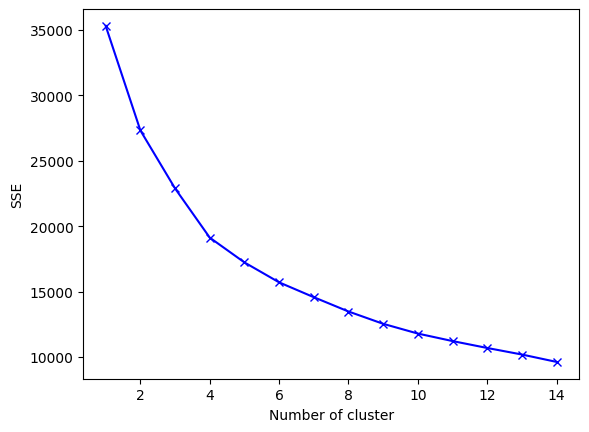

In [48]:
# Creating empty dict. for sum square error
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_

# PLotting with titles
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

**Observations:**
- Looking at the plot, 4 clusters seems to be the best elbow point.
- We will fit the K-means algorithm with K=4 to get the labels.

In [49]:
# Creating a copy of the data
data_copy = df.copy()
# Dropping REASON column as it's not a numerical columm
data_copy.drop('REASON', axis =1 , inplace = True)


# K means parameters
kmeans = KMeans(n_clusters = 4, max_iter = 1000, random_state = 1)

# Fitting to our pcq data
kmeans.fit(data_pca)

# Adding predicted labels to the copied data
data_copy['Labels'] = kmeans.predict(data_pca)



In [50]:
# Number of observations in each cluster
data_copy.Labels.value_counts()

,count
Labels,
0,2897
2,1491
1,1021
3,551


In [51]:
# Calculating summary statistics of the original data for each label
mean = data_copy.groupby('Labels').mean()

median = data_copy.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean','group_3 Mean',
                   'group_0 Median', 'group_1 Median', 'group_2 Median',
                   'group_3 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
BAD,0.197791,0.144956,0.094567,0.593466,0.000000,0.000000,0.000000,1.000000
LOAN,15025.923369,26023.604310,20789.336016,17797.459165,14000.000000,24900.000000,17800.000000,15700.000000
MORTDUE,56350.235609,142146.337347,56610.080837,60000.894504,55952.248342,131524.000000,56636.000000,58052.000000
VALUE,79912.032390,189016.799398,89971.466937,86775.377437,78220.000000,177328.000000,86851.000000,82764.000000
YOJ,5.428875,7.439373,16.730986,7.110345,5.000000,6.000000,17.000000,7.000000
DEROG,0.086296,0.081293,0.072435,1.626134,0.000000,0.000000,0.000000,1.000000
DELINQ,0.152226,0.253673,0.422535,1.974592,0.000000,0.000000,0.000000,1.000000
CLAGE,146.236346,213.959669,232.933288,145.306118,135.300000,207.288933,223.603329,130.496983
NINQ,0.977563,1.165524,0.688799,3.493648,1.000000,1.000000,0.000000,2.000000
CLNO,17.303763,28.321254,22.576794,25.281307,18.000000,26.000000,21.000000,24.000000


# **Observations:**
* Cluster 0 - This cluster has, on average, the lowest loan, years at current job, age of oldest credit line, number of existing credit lines and the most missing values. Probably younger applicants.

* Cluster 1 - The biggest spenders group. On average, they have a bigger loan, mortgage due, value of property and number of existing credit lines.

* Cluster 2 -The safest cluster for the bank. They have been working the longest on average at their current job. They have the highest value to mortgage due ratio, the least amount of major derogatory reports and the oldest credit lines.There's an 9.5% chance that they default on their loan.


* Cluster 3 -   The riskiest group for the bank. 59% of people default on their loan. They have a higher number of major derogatory reports, delinquent credit lines, and recent credit inquiries. Their oldest credit line is relatively young and they have a high number of rows with at least one missing value.








### Treating Outliers

In [52]:
# We will eliminate outliers for every column except : DEROG, DELINQ and NINQ
# Because these column's outliers are correlated to the odds of defaulting

# Creating numerical column list without these columns
num_columns_outliers = num_columns.copy()
num_columns_outliers.remove('DEROG')
num_columns_outliers.remove('DELINQ')
num_columns_outliers.remove('NINQ')

In [53]:
print(num_columns_outliers)

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'CLNO', 'Null_count']


In [54]:
# Cutting out all the outliers of the remaining numerical columns
for i in num_columns_outliers :
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[i] >= q1 - 1.5 * iqr) & (df[i] <= q3 + 1.5 * iqr)]

In [55]:
print(f' We got rid of {data.shape[0]-df.shape[0]} rows of data')

 We got rid of 1532 rows of data


In [56]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,Null_count
0,1,1100,25860.0,39025.0,HomeImp,10.5,0.0,0.0,94.366667,1.0,9.0,1
1,1,1300,70053.0,68400.0,HomeImp,7.0,0.0,2.0,121.833333,0.0,14.0,1
2,1,1500,13500.0,16700.0,HomeImp,4.0,0.0,0.0,149.466667,1.0,10.0,1
4,0,1700,97800.0,112000.0,HomeImp,3.0,0.0,0.0,93.333333,0.0,14.0,1
5,1,1700,30548.0,40320.0,HomeImp,9.0,0.0,0.0,101.466002,1.0,8.0,0


## **Important Insights from EDA**



* People with **1-2 missing values** have a much **higher risk** of defaulting on their loan

* Applicants with **lower property value** also have a much higher risk of defaulting on their loan

* Having at least **1 major derogatory report or 1 delinquent credit line**  indicates a **higher chance of defaulting** on your loan

* If you've **inquiried for multiple credit lines recently**, you're more **likely to default**.

* The **safest applicants** are those who have been employed at their current job for a relatively long time, have a high value-to-mortgage ratio and have no delinquent credit lines or derogatory reports. Additionally, they tend to have an old credit line

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the models
- Fit on the train data
- Tune the models
- Test the models on test dataset

In [57]:
# Creating dummy variables.
col_name = ['REASON']
df = pd.get_dummies(data = df, columns = col_name , drop_first= True)

In [58]:
# Creating two ratio of datasets to compare results

# Separating the target variable and other variables
Y1 = df.BAD

X1 = df.drop(['BAD'], axis = 1)

# Splitting the data into training (70%) and testing (30%) while maintaining the class distribution
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.3, random_state = 1, stratify = Y1)

# Separating the target variable and other variables
Y2 = df.BAD

X2 = df.drop(['BAD'], axis = 1)

# Splitting the data into training (80%) and testing (20%) while maintaining the class distribution
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 1, stratify = Y2)



In [59]:
# Creating metric function to see how well our models do

def metrics_score(actual, predicted):

    # Printing precision, recall, F1 score and support
    print(classification_report(actual, predicted))

    # Creating confusion matrix
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (12, 5))

    # Creating heatmap of confusion matrix
    sns.heatmap(cm, annot = True, fmt = '.2f', cmap='GnBu', xticklabels = ['Repaid Loan', 'Defaulted'],
                yticklabels = ['Repaid Loan', 'Defaulted'])

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression

In [60]:
# Building a logistic regression with higher weight attributed to defaulted loans
lr = LogisticRegression(class_weight= {0: 0.17, 1: 0.83}, penalty='none', max_iter=100)
# Fitting the data
lr.fit(x_train1, y_train1)

LogisticRegression(class_weight={0: 0.17, 1: 0.83}, penalty='none')

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2459
           1       0.43      0.72      0.53       640

    accuracy                           0.74      3099
   macro avg       0.67      0.73      0.68      3099
weighted avg       0.81      0.74      0.76      3099



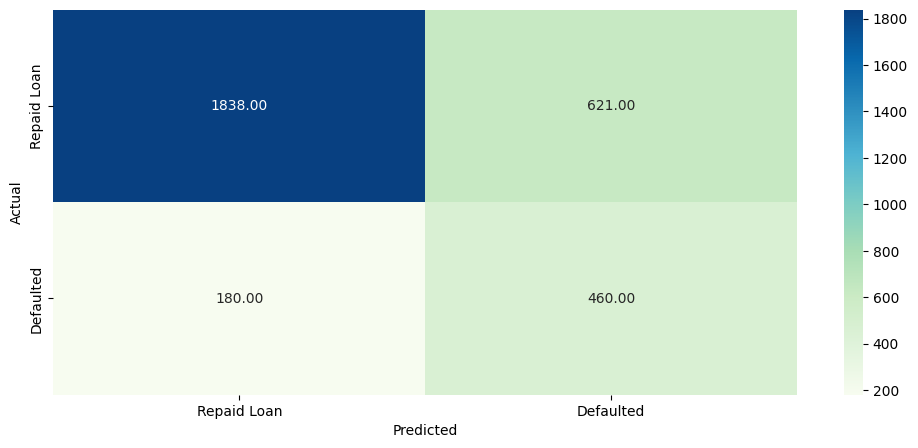

In [61]:
# Predicting the outcomes of our logistic regression
y_train_pred_log1 = lr.predict(x_train1)
# Checking performance on the training dataset
metrics_score(y_train1, y_train_pred_log1)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1054
           1       0.41      0.68      0.51       275

    accuracy                           0.73      1329
   macro avg       0.65      0.71      0.66      1329
weighted avg       0.80      0.73      0.75      1329



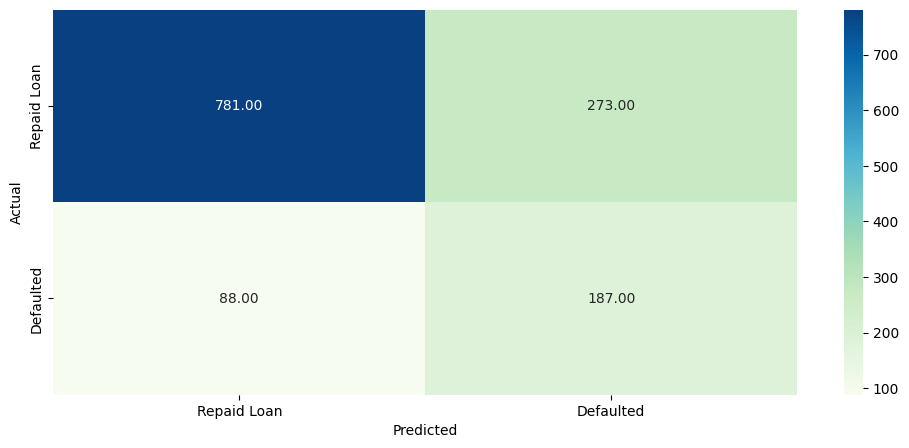

In [62]:
# Predicting the outcomes of our logistic regression 1 model
y_test_pred_lr = lr.predict(x_test1)
# Checking performance on the test dataset
metrics_score(y_test1, y_test_pred_lr)

In [63]:
# Building a logistic regression with balanced weight
# and a penalty which leads to simpler models by effectively selecting a subset of features
lr2 = LogisticRegression(class_weight= 'balanced',penalty = 'l1', solver = 'liblinear')
# Fitting the data
lr2.fit(x_train2, y_train2)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      2810
           1       0.49      0.73      0.58       732

    accuracy                           0.78      3542
   macro avg       0.70      0.77      0.72      3542
weighted avg       0.83      0.78      0.80      3542



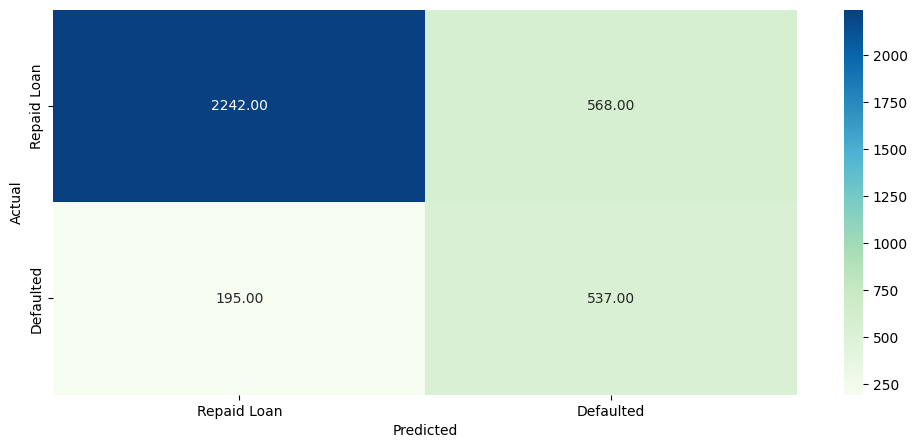

In [64]:
# Predicting the outcomes of our 2nd logistic regression model
y_train_pred_log2 = lr2.predict(x_train2)
# Checking performance on the training dataset
metrics_score(y_train2, y_train_pred_log2)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       703
           1       0.51      0.74      0.60       183

    accuracy                           0.80       886
   macro avg       0.72      0.78      0.73       886
weighted avg       0.84      0.80      0.81       886



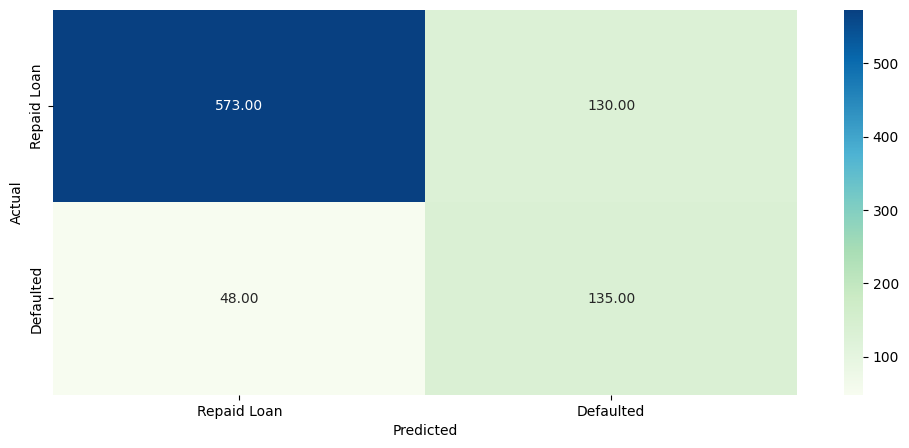

In [65]:
# Predicting the outcomes of our lr2 model
y_test_pred_lr2 = lr2.predict(x_test2)
# Checking performance on the test dataset
metrics_score(y_test2, y_test_pred_lr2)

# **Observations:**

* The logistic regression models are underperforming, with the highest Accuracy on testing data reaching only 80%.


### Decision Tree

In [66]:
# Building a decision tree model with higher weight attributed to defaulted loans
dt1 = DecisionTreeClassifier(class_weight= {0: 0.17, 1: 0.83}, random_state = 1)
# Fitting decision tree model
dt1.fit(x_train1, y_train1)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2459
           1       1.00      1.00      1.00       640

    accuracy                           1.00      3099
   macro avg       1.00      1.00      1.00      3099
weighted avg       1.00      1.00      1.00      3099



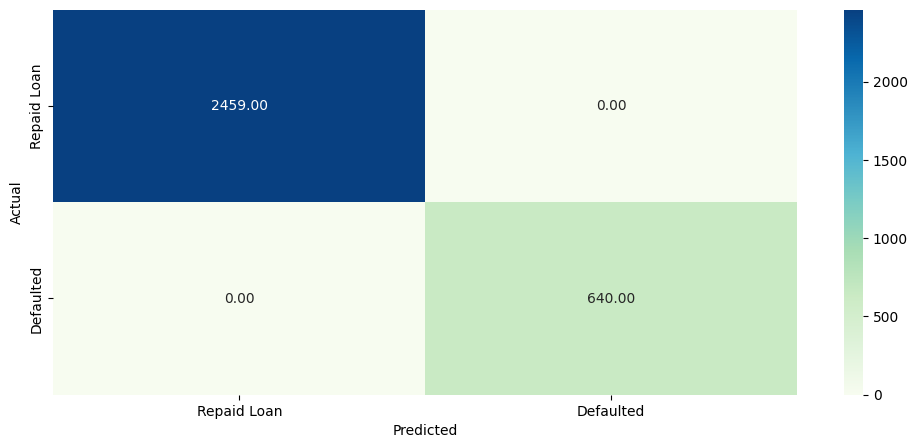

In [67]:
# Predicting the outcomes of our decision tree model 1
y_train_pred_dt1 = dt1.predict(x_train1)
# Checking performance on the training dataset
metrics_score(y_train1, y_train_pred_dt1)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1054
           1       0.69      0.57      0.63       275

    accuracy                           0.86      1329
   macro avg       0.79      0.75      0.77      1329
weighted avg       0.85      0.86      0.85      1329



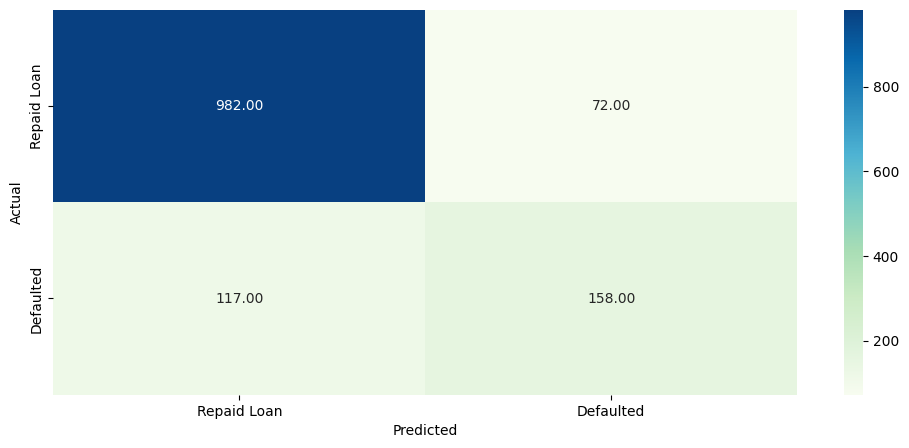

In [68]:
# Predicting the outcomes of our decision tree model 1
y_test_pred_dt1 = dt1.predict(x_test1)
# Checking performance on the test dataset
metrics_score(y_test1, y_test_pred_dt1)

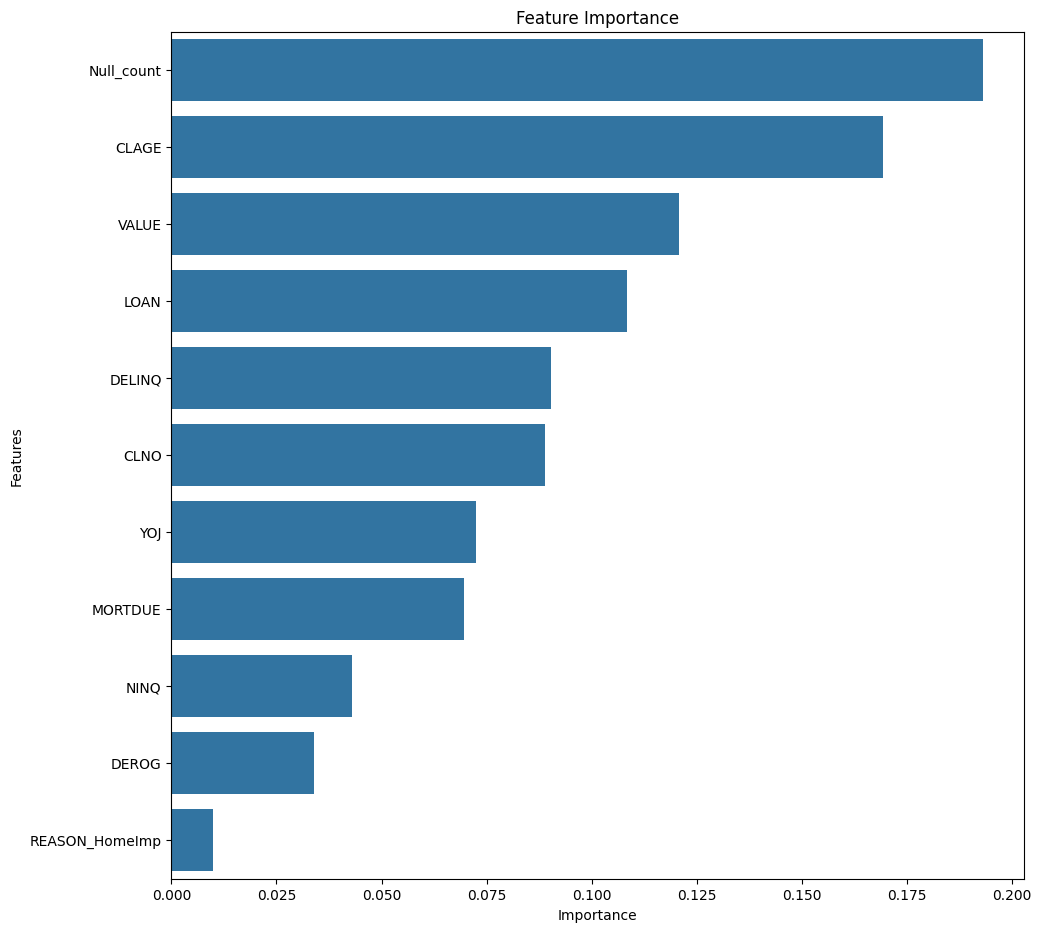

In [69]:
# Retrieving the importantance of each feature
importances = dt1.feature_importances_

# Retrieving the names of each column
columns = X1.columns

# Creating a dataframe with the importance of each column
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Plot the feature importance
plt.figure(figsize = (11, 11))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

# Adding labels and Title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# Showing the plot
plt.show();

# **Observations:**

* The decision tree has a **perfect score** for all metrics on the **training data**.
* It's a different story for the test data, we have a **69% precision** and **57% recall** for **defaulted loan** detection.
*The precision and recall scores are higher for repaid loans on the testing dataset (89% and 93% respectfully).
* "Null_count", "CLAGE" and "VALUE" make up almost 50% of the relative importance of the model.
* The model is clearly **overfitting the training data**.

### **Decision Tree - Hyperparameter Tuning**
* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**


In [70]:
# Making a decision tree classifier
dtree_estimator1 = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to go through for our decision tree
parameters = { 'max_depth': np.arange(2, 11), # depth of 2 to 11
    'criterion': ['gini', 'entropy'], # quality of split impurity of info. gained
    'min_samples_leaf': [1, 5, 10, 20, 25], # min. amount of data to be a leaf
    'min_samples_split': [2, 5, 10, 20], # min. amount of data to further split
    'max_leaf_nodes': [None, 10, 20, 30, 50], # max amount of leaf nodes in the tree
             }

# Type of scoring used to compare parameter is recall because we want to be certain
# about if the person will default. Losing a potential repaid loan isn't worth more than a
# defaulted loan.
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator1, parameters, scoring = scorer, cv = 5)

# Fitting the grid search on the training dataset
grid_CV = gridCV.fit(x_train1, y_train1)

# Set the classifier to the best combination of parameters
dtree_estimator1 = grid_CV.best_estimator_


In [71]:
# Fit the best estimator to the data
dtree_estimator1.fit(x_train1, y_train1)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=30, min_samples_leaf=25,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2459
           1       0.49      0.84      0.62       640

    accuracy                           0.79      3099
   macro avg       0.72      0.81      0.73      3099
weighted avg       0.85      0.79      0.80      3099



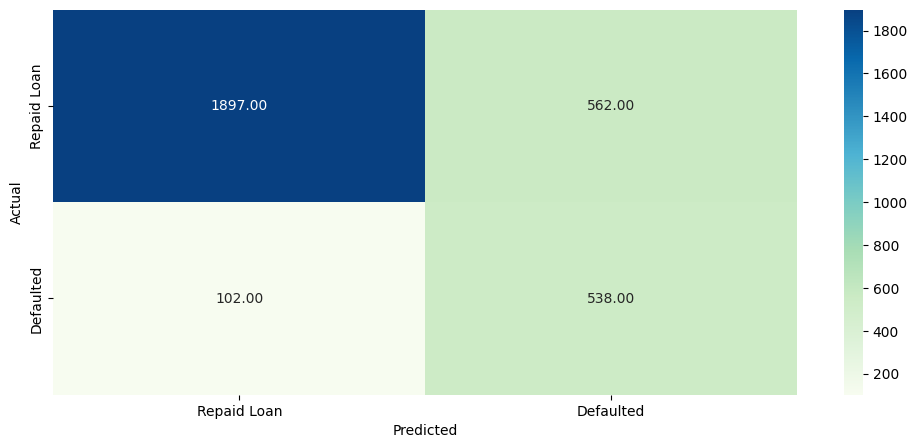

In [72]:
# Predicting the outcomes of our decision tree model with training dataset
y_train_para_dt1 = dtree_estimator1.predict(x_train1)
# Checking performance on the training dataset
metrics_score(y_train1, y_train_para_dt1)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1054
           1       0.49      0.78      0.60       275

    accuracy                           0.78      1329
   macro avg       0.71      0.78      0.72      1329
weighted avg       0.84      0.78      0.80      1329



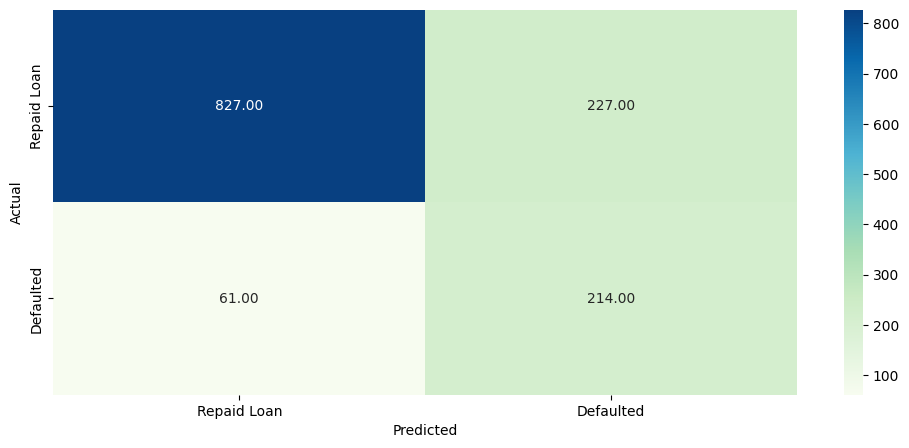

In [73]:
# Predicting the outcomes of our decision tree model with testing dataset
y_test_para_dt1 = dtree_estimator1.predict(x_test1)
# Checking performance on the testing dataset
metrics_score(y_test1, y_test_para_dt1)

In [74]:
# Making a decision tree classifier #2 with 80/20 split
dtree_estimator2 = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to go through for our decision tree
parameters = { 'max_depth': np.arange(2, 11), # depth of 2 to 11
    'criterion': ['gini', 'entropy'], # quality of split impurity of info. gained
    'min_samples_leaf': [1, 5, 10, 20, 25], # min. amount of data to be a leaf
    'min_samples_split': [2, 5, 10, 20], # min. amount of data to further split
    'max_leaf_nodes': [None, 10, 20, 30, 50], # max amount of leaf nodes in the tree
             }

# Type of scoring used to compare parameter is recall because we want to be certain
# about if the person will default. Losing a potential repaid loan isn't worth more than a
# defaulted loan.
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV2 = GridSearchCV(dtree_estimator2, parameters, scoring = scorer, cv = 5)

# Fitting the grid search on the training dataset
grid_CV2 = gridCV2.fit(x_train2, y_train2)

# Set the classifier to the best combination of parameters
dtree_estimator2 = grid_CV2.best_estimator_

In [75]:
# Fit the best estimator to the data
dtree_estimator2.fit(x_train2, y_train2)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=30, min_samples_leaf=20,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      2810
           1       0.48      0.85      0.61       732

    accuracy                           0.78      3542
   macro avg       0.72      0.81      0.73      3542
weighted avg       0.85      0.78      0.80      3542



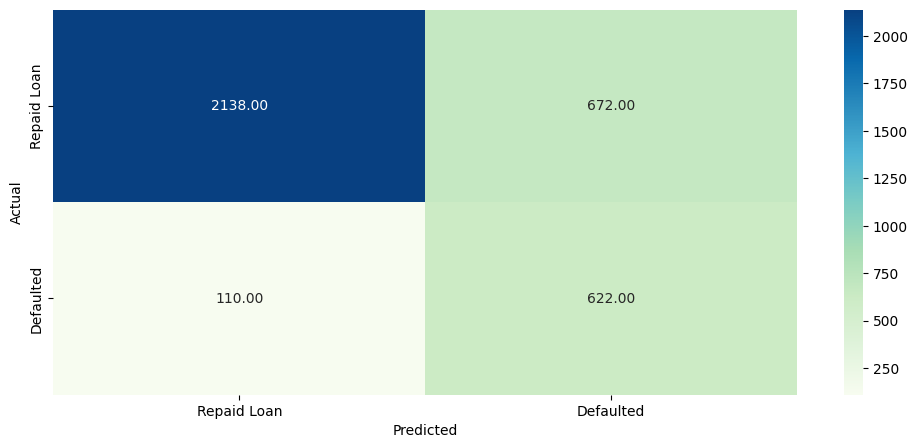

In [76]:
# Predicting the outcomes of our decision tree model with training dataset
y_train_para_dt2 = dtree_estimator2.predict(x_train2)
# Checking performance on the training dataset
metrics_score(y_train2, y_train_para_dt2)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       703
           1       0.49      0.80      0.61       183

    accuracy                           0.79       886
   macro avg       0.72      0.79      0.73       886
weighted avg       0.85      0.79      0.80       886



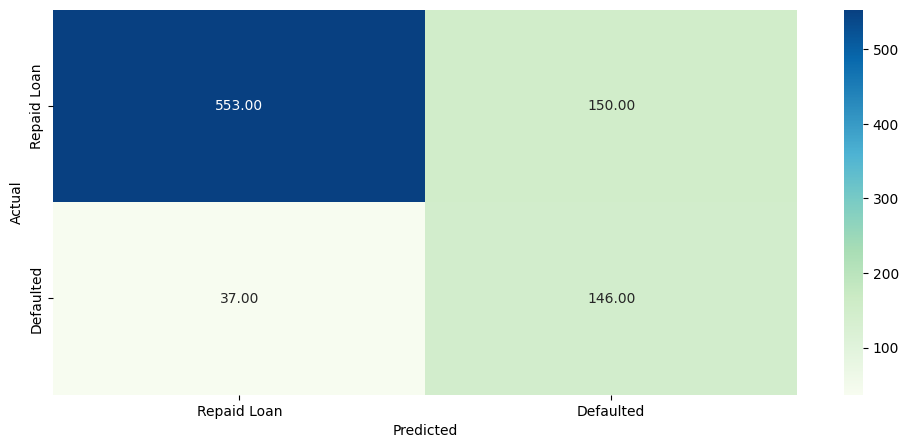

In [77]:
# Predicting the outcomes of our decision tree model with testing dataset
y_test_para_dt2 = dtree_estimator2.predict(x_test2)
# Checking performance on the testing dataset
metrics_score(y_test2, y_test_para_dt2)

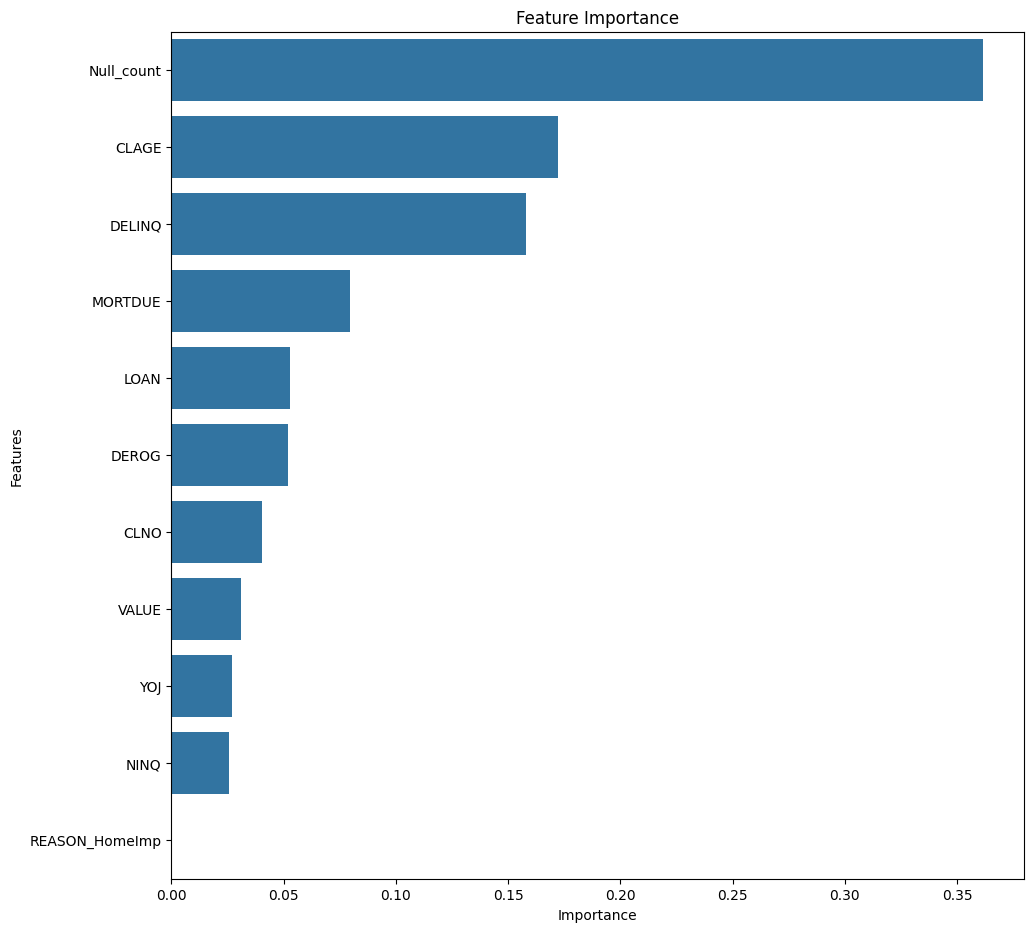

In [78]:
# Retrieving the importantance of each feature
importances = dtree_estimator2.feature_importances_

# Retrieving the names of each column
columns = X2.columns

# Creating a dataframe with the importance of each column
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Plot the feature importance
plt.figure(figsize = (11, 11))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

# Adding labels and Title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# Showing the plot
plt.show();

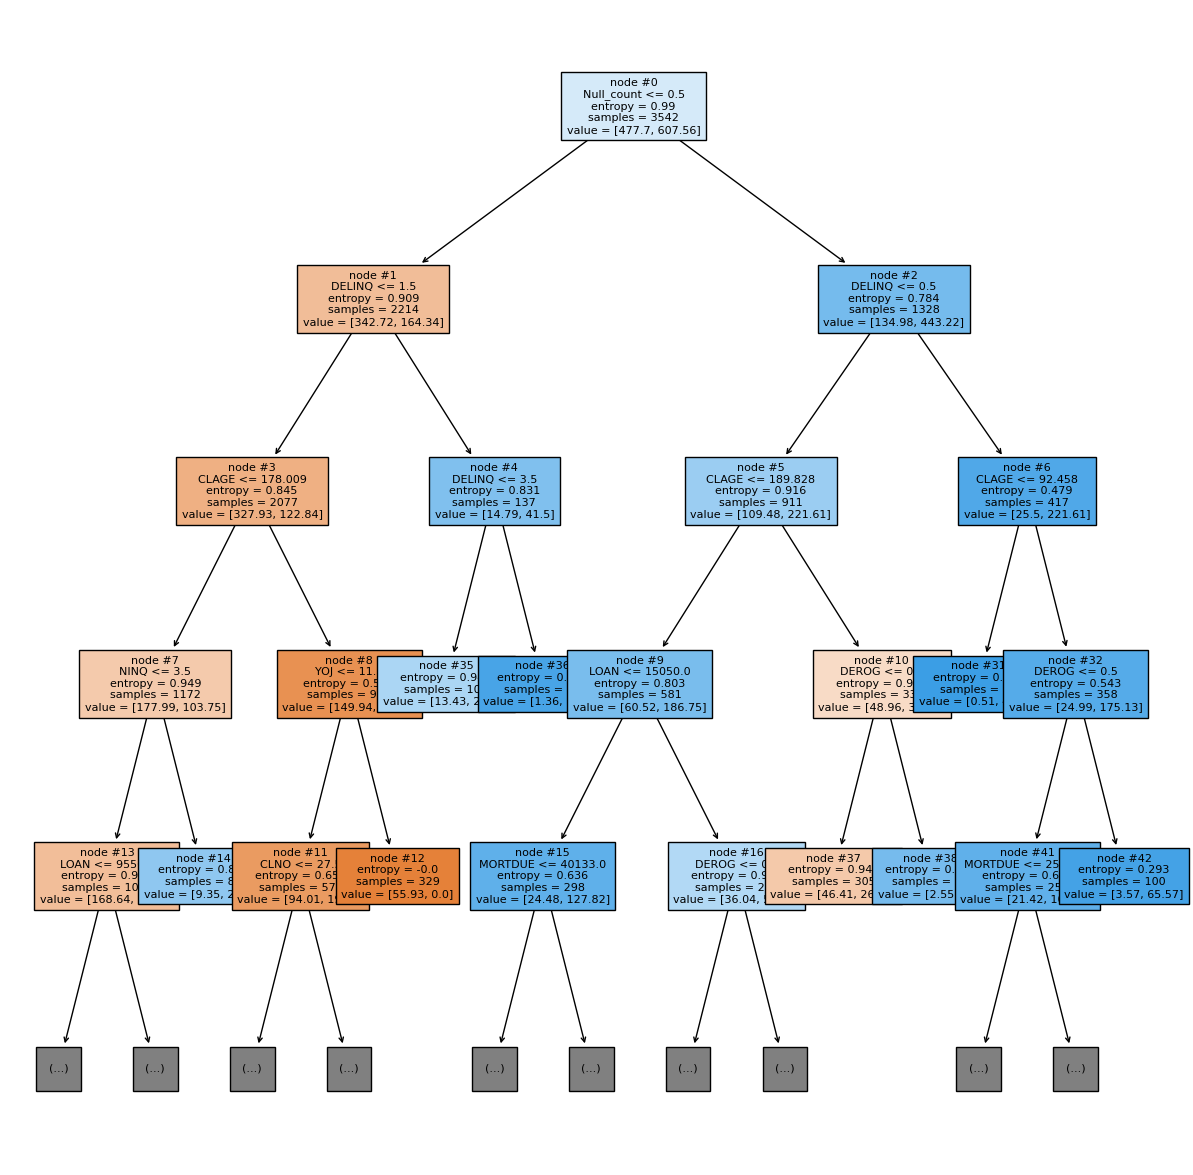

In [79]:
# Creating a list of the features
features = list(X2.columns)

# Plotting the figure and it's size
plt.figure(figsize = (15, 15))

# Plotting the tree plot with our tuned decision tree model #2
tree.plot_tree(dtree_estimator2, max_depth = 4, feature_names = features, filled = True, fontsize = 8, node_ids = True, class_names = None)

# Showing the plot
plt.show()

# **Observations:**

* The tuned decision tree #2 has a better Recall score (80% vs 78%)
* "Null_count", "CLAGE" and "DELINQ" make up more than 65% of the relative importance of the model.
* The models are not overfitting the training data.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [80]:
# Building our random forest classifier
rf_estimator1 = RandomForestClassifier(class_weight = 'balanced', random_state = 1)
# Fitting the Random Forest classifier on the training data
rf_estimator1.fit(x_train1, y_train1)

RandomForestClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2459
           1       1.00      1.00      1.00       640

    accuracy                           1.00      3099
   macro avg       1.00      1.00      1.00      3099
weighted avg       1.00      1.00      1.00      3099



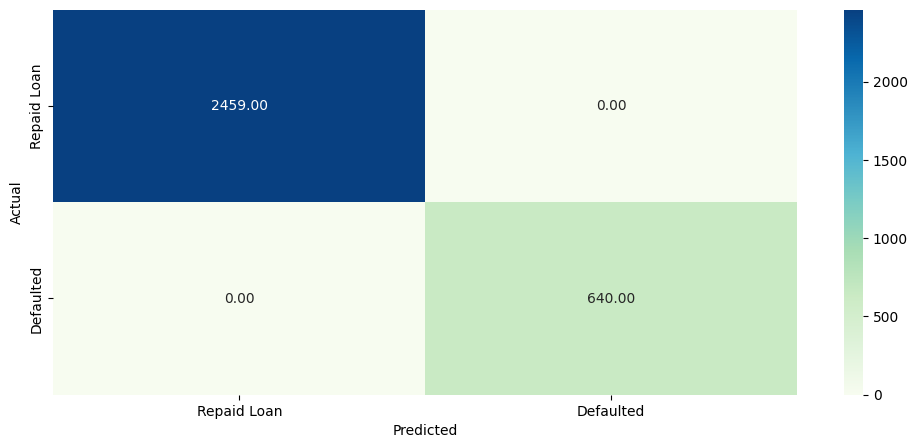

In [81]:
# Predicting the outcomes of our random forest model with training dataset
y_pred_train_rf1 = rf_estimator1.predict(x_train1)
# Checking performance on the training data
metrics_score(y_train1, y_pred_train_rf1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1054
           1       0.87      0.59      0.70       275

    accuracy                           0.90      1329
   macro avg       0.88      0.78      0.82      1329
weighted avg       0.89      0.90      0.89      1329



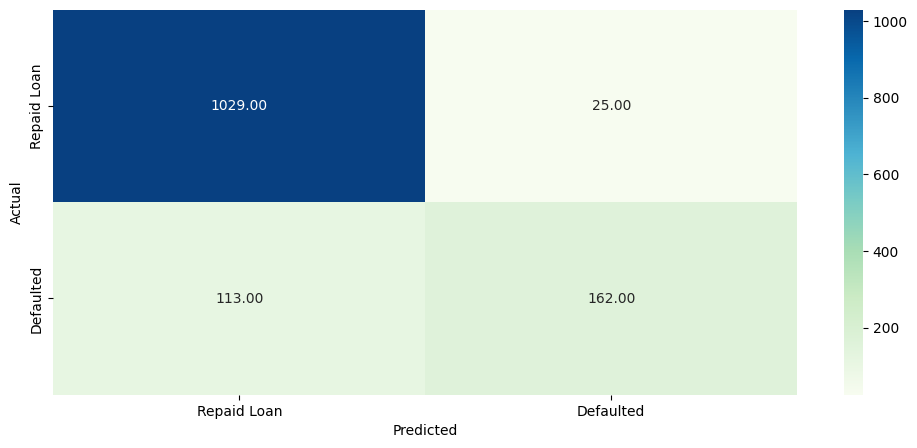

In [82]:
# Predicting the outcomes of our random forest model with testing dataset
y_pred_test_rf1 = rf_estimator1.predict(x_test1)
# Checking performance on the testing data
metrics_score(y_test1, y_pred_test_rf1)

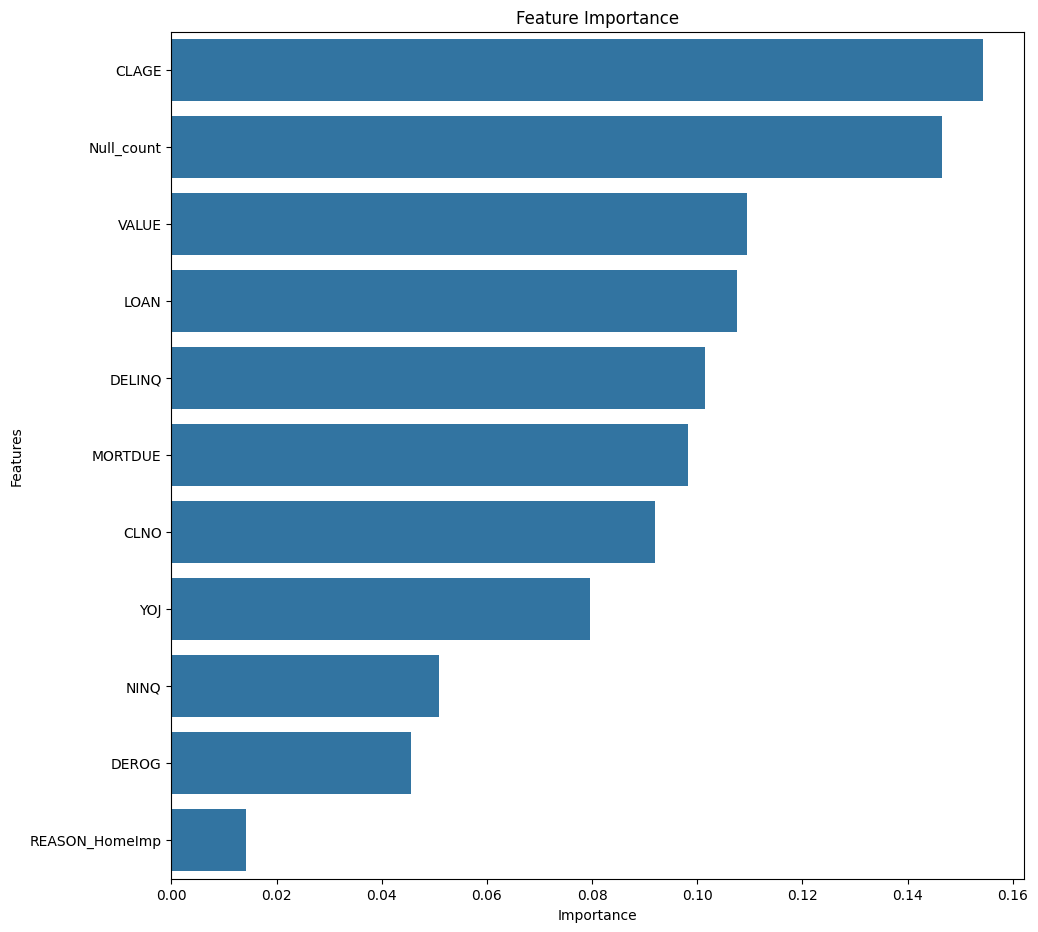

In [83]:
# Retrieving the importantance of each feature
importances = rf_estimator1.feature_importances_

# Retrieving the names of each column
columns = X1.columns

# Creating a dataframe with the importance of each column
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Plot the feature importance
plt.figure(figsize = (11, 11))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

# Adding labels and Title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# Showing the plot
plt.show();

# **Observations:**

* The random forest model has **a perfect score** for all metrics on the **training data**.
* It's a different story for the test data, we have a **87% precision** and **59% recall** for **Defaulted loan predictions**.
*The precision and recall scores are higher for repaid loans on the testing dataset (90% and 98% respectfully).
* 7 features make up more than 80% of the relative importance of the model.
* The model is **overfitting the training data**.


### **Random Forest Classifier Hyperparameter Tuning**

In [84]:
# Choose the type of classifier
rf_estimator_tuned1 = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

# Grid of parameters to choose from
# min_sample_leafs starting at 2 because overfits if start at 1
params_rf = {
         "n_estimators": [200,500,600],
         "min_samples_leaf": [2,3,4,5],
         "max_features": ['log2','auto','None']}


# Type of scoring used to compare parameter is recall because we want to be certain
# about if the person will default. Losing a potential repaid loan isn't worth more than a
# defaulted loan.
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search with 5-fold cross-validation
grid_obj = GridSearchCV(rf_estimator_tuned1, params_rf, scoring = scorer, cv = 5)

# Fitting the grid search on our training data
grid_obj_f = grid_obj.fit(x_train1, y_train1)

# Set the classifier to the best combination of parameters
rf_estimator_tuned1 = grid_obj_f.best_estimator_

In [85]:
rf_estimator_tuned1.fit(x_train1, y_train1)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_leaf=5, n_estimators=600, random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2459
           1       0.85      0.94      0.89       640

    accuracy                           0.95      3099
   macro avg       0.92      0.95      0.93      3099
weighted avg       0.96      0.95      0.95      3099



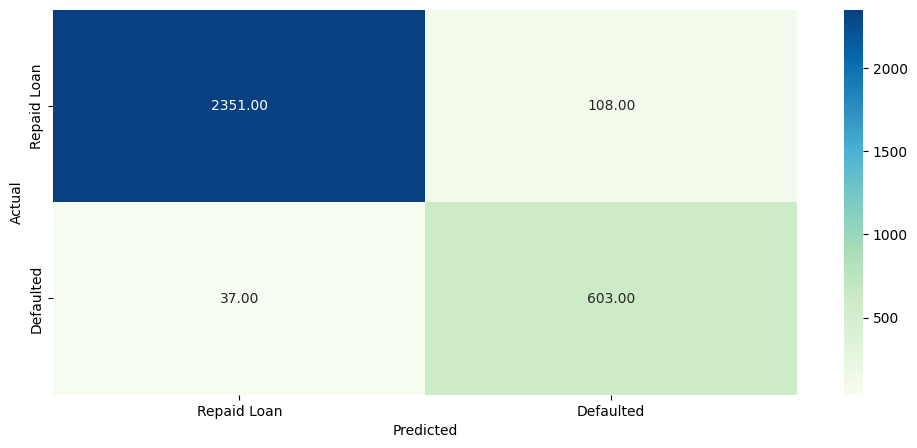

In [86]:
# Predicting the outcomes of our random forest model with training dataset
y_pred_train_rf_tuned1 = rf_estimator_tuned1.predict(x_train1)
# Checking performance on the training data
metrics_score(y_train1, y_pred_train_rf_tuned1)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1054
           1       0.76      0.71      0.73       275

    accuracy                           0.89      1329
   macro avg       0.84      0.82      0.83      1329
weighted avg       0.89      0.89      0.89      1329



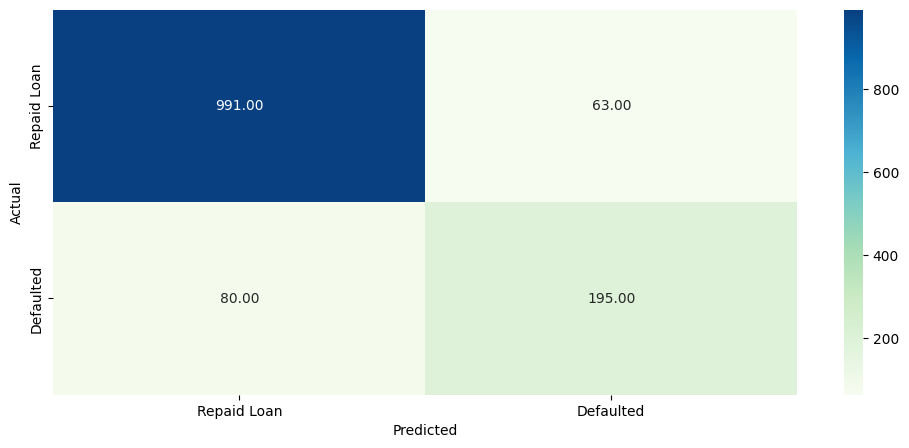

In [87]:
# Predicting the outcomes of our random forest model with test dataset
y_pred_test_rf_tuned1 = rf_estimator_tuned1.predict(x_test1)
# Checking performance on the test data
metrics_score(y_test1, y_pred_test_rf_tuned1)

In [88]:
# 2nd random forest model with 80/20 split
# Choose the type of classifier
rf_estimator_tuned2 = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

# Grid of parameters to choose from
# min_sample_leafs starting at 2 because overfits if start at 1
# num estimators = num of decision trees created
#'log2': The square root of the total number of features.
#'auto': The square root of the total number of features.
#'None': Consider all features.
params_rf = {
         "n_estimators": [200,500,600],
         "min_samples_leaf": [2,3,4,5],
         "max_features": ['log2','auto','None']}


# Type of scoring used to compare parameter is recall because we want to be certain
# about if the person will default. Losing a potential repaid loan isn't worth more than a
# defaulted loan.
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search with 5-fold cross-validation
grid_obj = GridSearchCV(rf_estimator_tuned2, params_rf, scoring = scorer, cv = 5)

# Fitting the grid search on our training data
grid_obj_f = grid_obj.fit(x_train2, y_train2)

# Set the classifier to the best combination of parameters
rf_estimator_tuned2 = grid_obj_f.best_estimator_

In [89]:
rf_estimator_tuned2.fit(x_train2, y_train2)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_leaf=5, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2810
           1       0.86      0.94      0.90       732

    accuracy                           0.96      3542
   macro avg       0.92      0.95      0.94      3542
weighted avg       0.96      0.96      0.96      3542



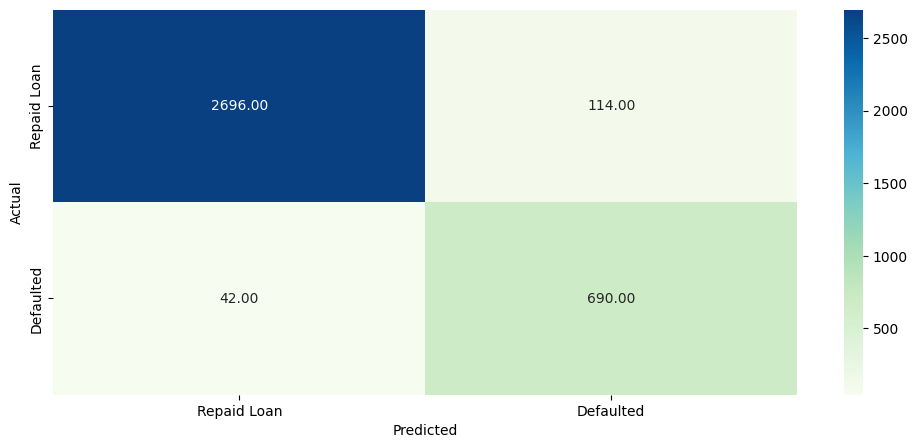

In [90]:
# Predicting the outcomes of our random forest model with training dataset
y_pred_train_rf_tuned2 = rf_estimator_tuned2.predict(x_train2)
# Checking performance on the training data
metrics_score(y_train2, y_pred_train_rf_tuned2)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       703
           1       0.76      0.73      0.74       183

    accuracy                           0.90       886
   macro avg       0.84      0.84      0.84       886
weighted avg       0.89      0.90      0.90       886



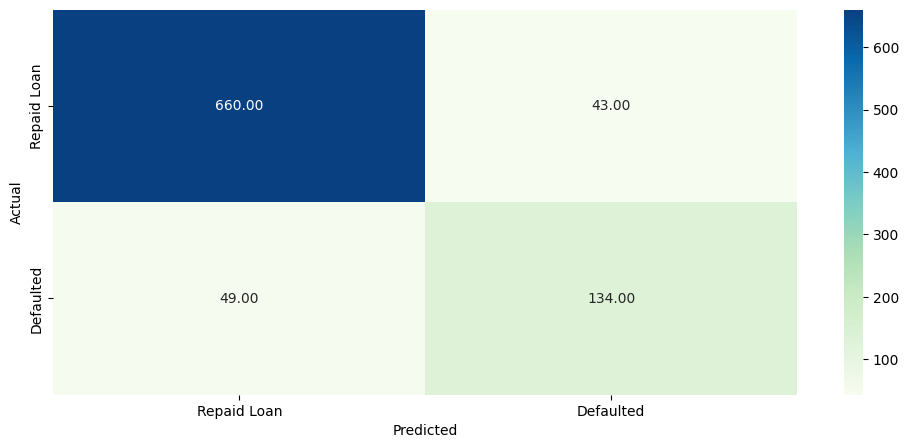

In [91]:
# Predicting the outcomes of our random forest model with test dataset
y_pred_test_rf_tuned2 = rf_estimator_tuned2.predict(x_test2)
# Checking performance on the test data
metrics_score(y_test2, y_pred_test_rf_tuned2)

<Axes: xlabel='Importance', ylabel='None'>

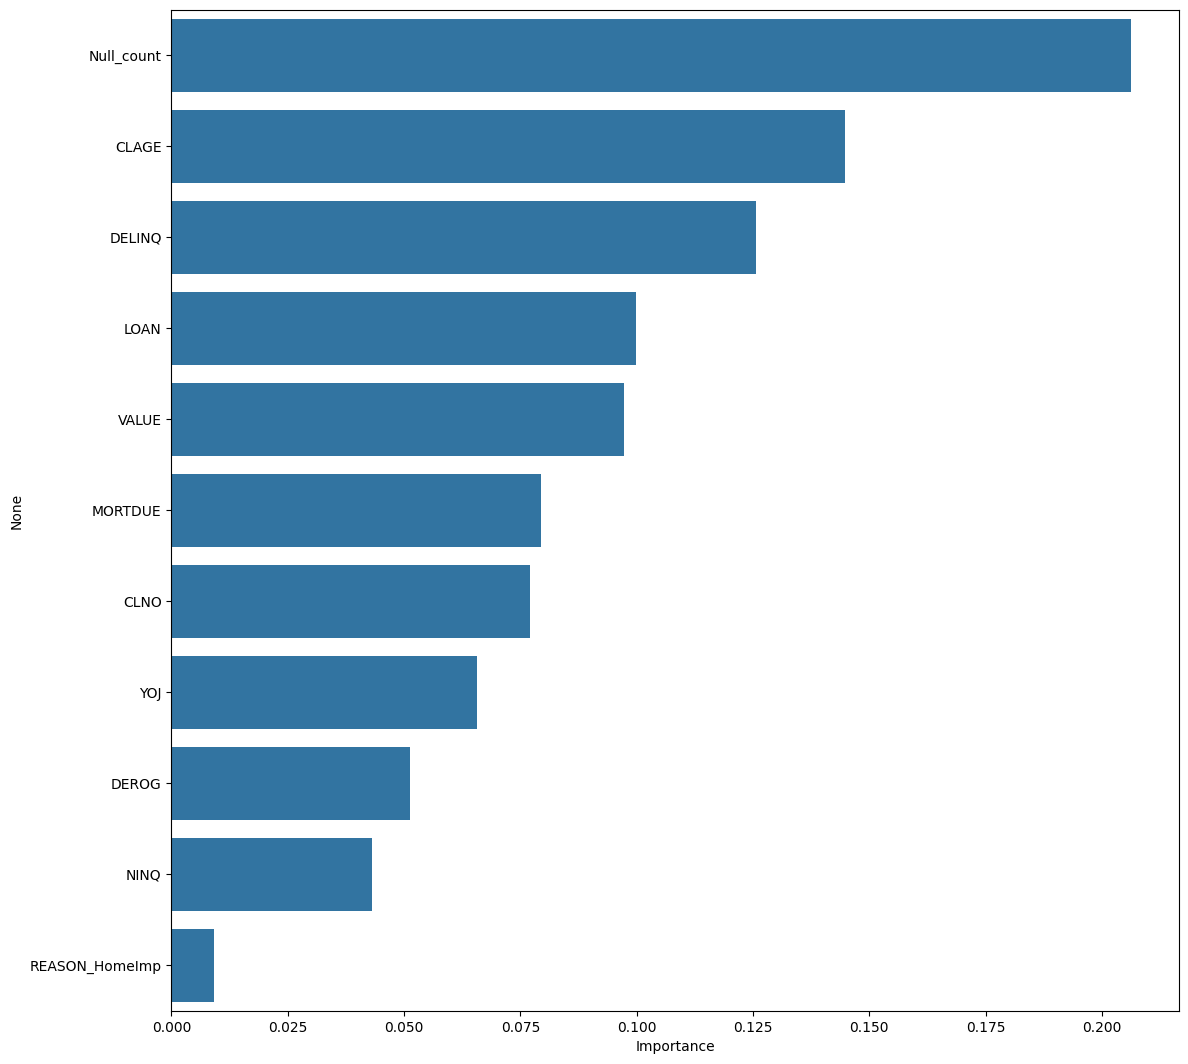

In [92]:
# Plotting feature importance for 2nd random forest
importances = rf_estimator_tuned2.feature_importances_

columns = X2.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

# **Observations:**

* Null_count is the most important feature to determine if someone is going to default on their loan according to the rf_estimator_tuned2.
* The second Random Forest model, trained on a larger dataset, achieved the highest F1-score among all models tested.

**Refined insights:**
* If the bank wants to balance the approval of eligible loans with the minimization of defaults, the bank should consider the rf_estimator_tuned2 model. This model demonstrates a strong overall performance with its high F1-score and a good balance between precision and recall.
* Loan officers must have access to all requested applicant data to make informed decisions. Missing information could indicate potential risks and increase the likelihood of loan default. This feature is arguably the most important feature.
* The people with relatively young oldest credit lines are more likely to default on their loan. This is a relatively import feature across the board of models.
* The number of delinquent credit lines is more important for determining a potential default than the number of derogatory reports.

* Safer applicant have on average an oldest credit line of about 251 months, no missing values, no major derogatory reports, no recent credit inquiries and has worked at their job for at least 14 years.